<a href="https://colab.research.google.com/github/PriyathamVarma/PriyathamVarma/blob/main/DataMining_CW2_100346825.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending club loan prediction using classification and clustering

The aim of this wok is to predict good or bad loan based on various features taken from Lending club loan dataset from 2018 to 2020.

#Summary of features
1. Load the dataset
2. Import required libraries
3. Grouping by data type
4. Exploratory data analysis
5. Grouping by correlated features

In [ ]:
#Load the dataset
#importing from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/db/LendingClubLoans2018-2020.xlsx"
data_frame = pd.read_excel(path)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
#Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#Encoding dependent variables
from sklearn.preprocessing import LabelEncoder
#Splitting into training and testing sets
from sklearn.model_selection import train_test_split
#Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [ ]:
#Dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Columns: 108 entries, id to orig_projected_additional_accrued_interest
dtypes: datetime64[ns](5), float64(49), int64(39), object(15)
memory usage: 63.6+ MB


#summary of dataset features
Total data instances : 77159 (0 to 77158)

Toatl data fields    : 108

Numerical type data  : 88 (82% of all data types)

Categorical type data: 15 (14% of all data types)

Date type data.      : 5 (4% of all data types) 


Fully Paid            44.439404
Current               41.523348
Charged Off           12.459985
Late (31-120 days)     0.854081
In Grace Period        0.580619
Late (16-30 days)      0.124418
Default                0.018144
Name: loan_status, dtype: float64


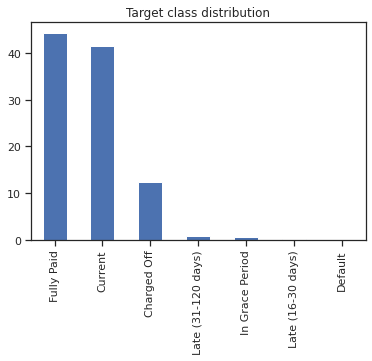

In [ ]:
#Target class distribution
data_frame
plotPurpose = data_frame['loan_status'].value_counts()

plotPercentage = plotPurpose/(len(data_frame))*100

print(plotPercentage)
plt.title('Target class distribution')
plotPercentage.plot(kind="bar")

# Grouping of data types
1. Grouping of similar data types
2. Summary of features for grouped data(exploratory data analysis)
3. Grouping by correlation

In [ ]:
#Grouping of similar data types
data_frame_nan = data_frame.fillna(0)
data_frame_nan.isna().sum()#for analyzing purpose only

id                                            0
emp_title                                     0
application_type                              0
home_ownership                                0
loan_status                                   0
                                             ..
deferral_term                                 0
hardship_amount                               0
hardship_payoff_balance_amount                0
hardship_last_payment_amount                  0
orig_projected_additional_accrued_interest    0
Length: 108, dtype: int64

In [ ]:
#Numerical data
numerical_data = data_frame.select_dtypes(include =["int","float"])
numerical_data.shape
numerical_data_columns=numerical_data.columns
numerical_data_columns

Index(['id', 'loan_amnt', 'int_rate', 'installment', 'annual_inc',
       'annual_inc_joint', 'dti', 'dti_joint', 'delinq_2yrs', 'inq_fi',
       'inq_last_12m', 'inq_last_6mths', 'fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'mort_acc', 'open_acc',
       'open_acc_6m', 'acc_open_past_24mths', 'pub_rec', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'total_cu_tl',
       'tot_coll_amt', 'tot_cur_bal', 'total_bal_il', 'total_rev_hi_lim',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'mths_since_last_record',
       'mths_since_last_major_derog', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_rcnt_il', 'mths_since_last_delinq',
       'mths_since_recent_revol_delinq', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcn

In [ ]:
#Numrical data summary
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77159 entries, 0 to 77158
Data columns (total 88 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          77159 non-null  int64  
 1   loan_amnt                                   77159 non-null  int64  
 2   int_rate                                    77159 non-null  float64
 3   installment                                 77159 non-null  float64
 4   annual_inc                                  77159 non-null  float64
 5   annual_inc_joint                            9382 non-null   float64
 6   dti                                         77051 non-null  float64
 7   dti_joint                                   9382 non-null   float64
 8   delinq_2yrs                                 77159 non-null  int64  
 9   inq_fi                                      74664 non-null  float64
 10  inq_last_1

In [ ]:
#missing values percentage in numerical data
numerical_data.isnull().sum()
numerical_missing_fractions = numerical_data.isnull().mean().sort_values(ascending=False)
(numerical_missing_fractions*100).head(37)

deferral_term                                 94.179551
orig_projected_additional_accrued_interest    92.238106
hardship_payoff_balance_amount                92.072215
hardship_amount                               92.072215
hardship_last_payment_amount                  92.072215
revol_bal_joint                               87.840693
annual_inc_joint                              87.840693
dti_joint                                     87.840693
mths_since_last_record                        85.281043
mths_since_recent_bc_dlq                      77.456940
mths_since_last_major_derog                   74.242797
mths_since_recent_revol_delinq                67.123732
mths_since_last_delinq                        51.380915
il_util                                       17.187885
mths_since_recent_inq                         11.979160
mths_since_rcnt_il                             6.323306
all_util                                       3.254319
inq_last_12m                                   3

#Observations on numerical data
1. Numerical data has 37 features with null values percentage ranging from 0.006 to 94%.

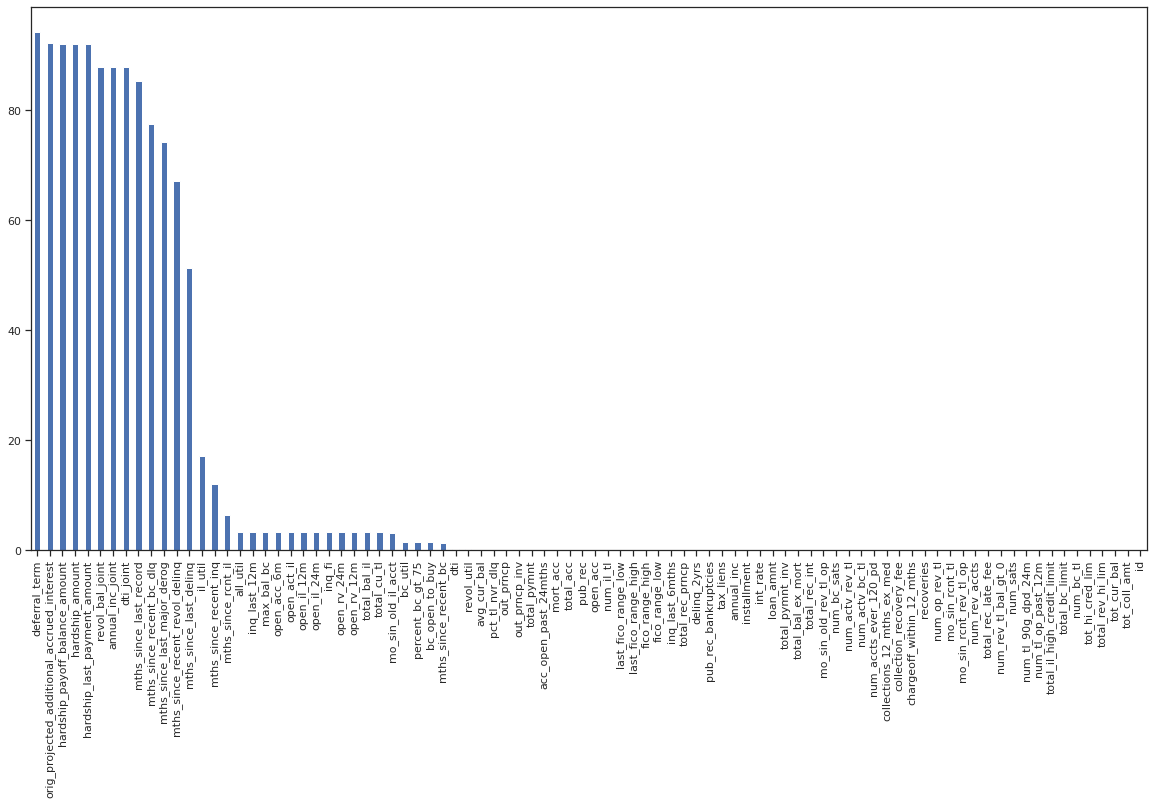

In [ ]:
numerical_graph = numerical_missing_fractions*100
plt.figure(figsize=(20,10))
numerical_graph.plot(kind ="bar")
plt.show()

In [ ]:
#EDA for Numerical data
#taken from Lab2_PandasPractice_Sols
# Go through all the numeric attributes generating the stats and storing them in the dataframe you created
for column in numerical_data:
    numerical_data.loc['median',column] = numerical_data[column].median()
    numerical_data.loc['missing',column] = numerical_data[column].isnull().sum()
numerical_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


id  ...  orig_projected_additional_accrued_interest
0        113924213.0  ...                                         NaN
1        113101099.0  ...                                         NaN
2        113672609.0  ...                                         NaN
3        115053799.0  ...                                         NaN
4          6317122.0  ...                                   116.43000
...              ...  ...                                         ...
77156    125555899.0  ...                                         NaN
77157    117270963.0  ...                                         NaN
77158    117596312.0  ...                                         NaN
median   117876827.0  ...                                    97.77177
missing          0.0  ...                                 71171.00000

[77161 rows x 88 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

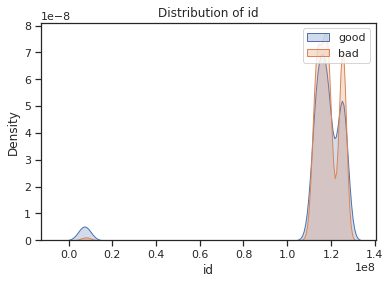

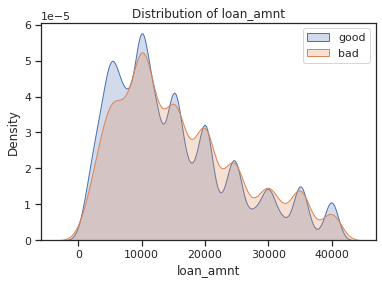

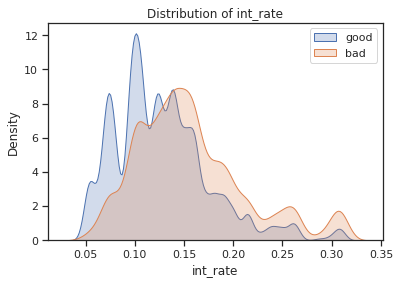

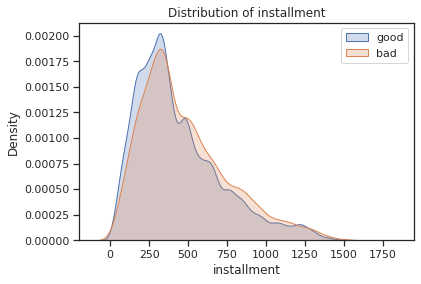

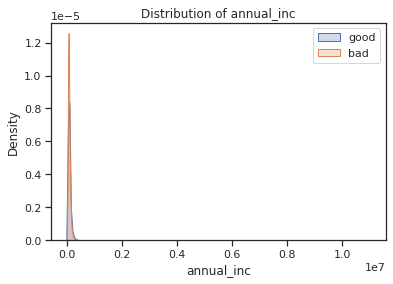

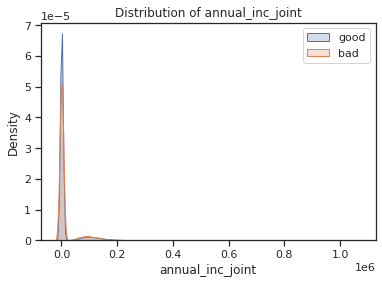

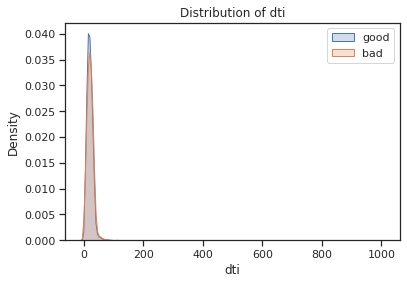

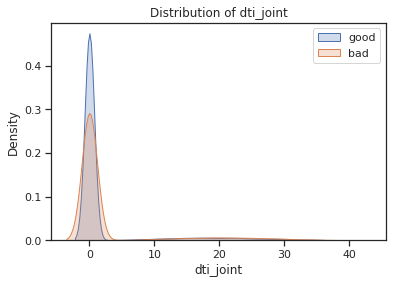

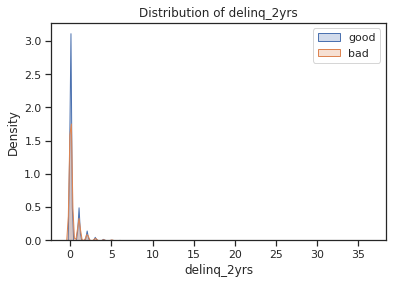

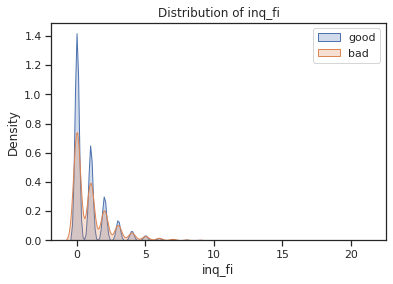

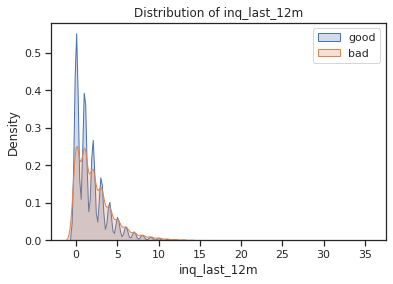

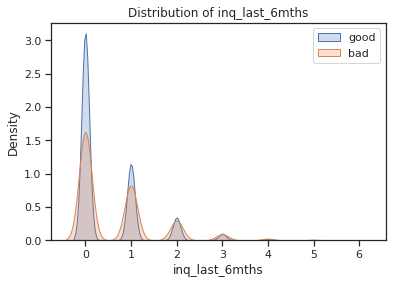

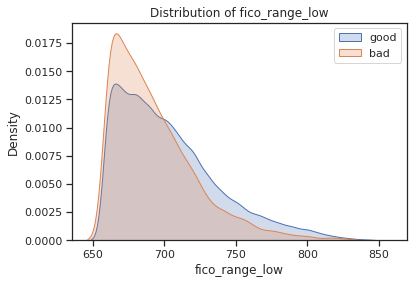

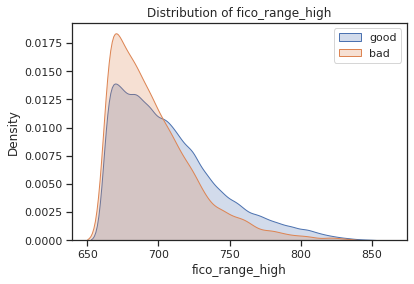

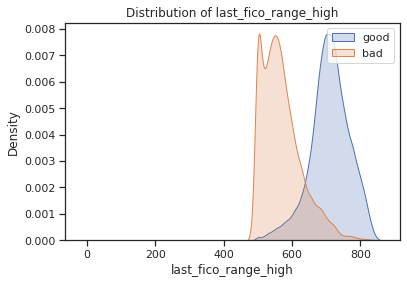

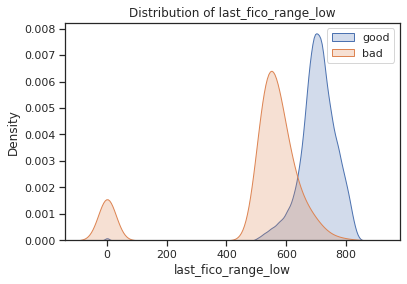

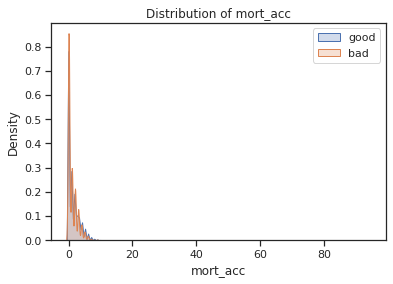

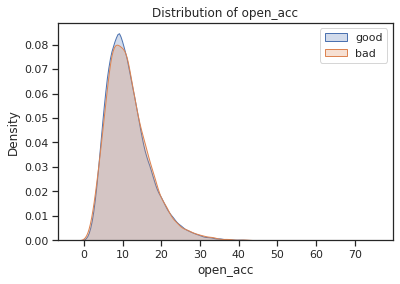

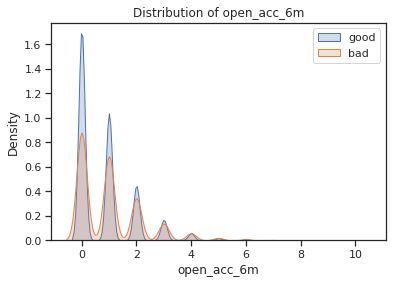

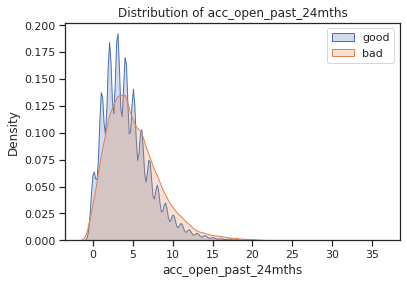

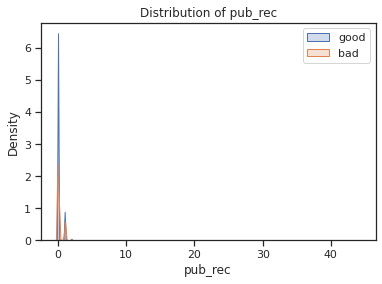

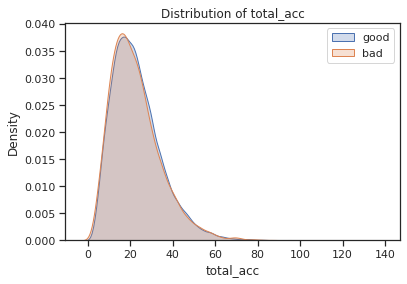

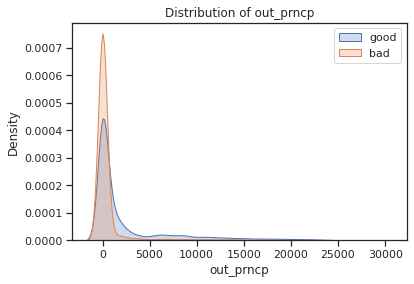

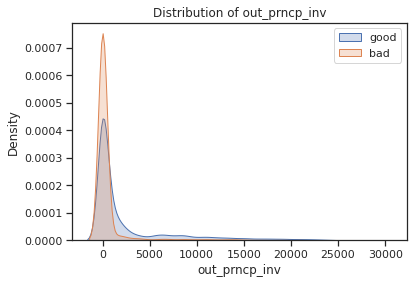

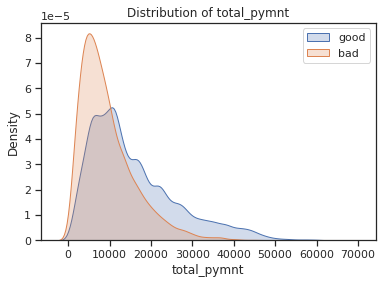

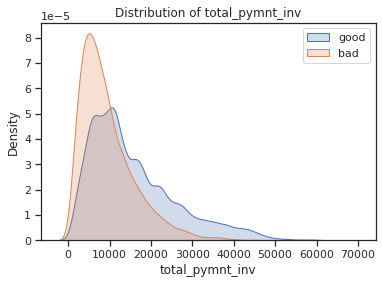

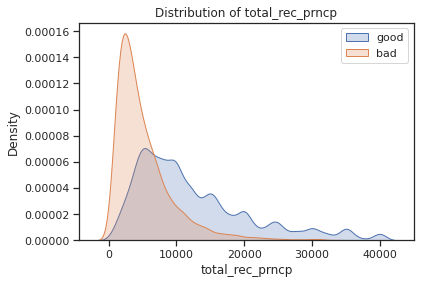

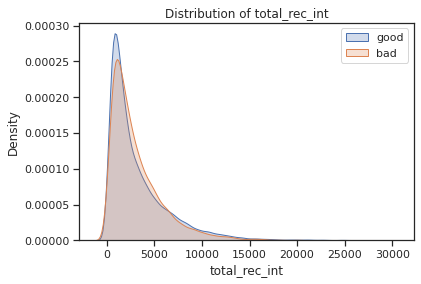

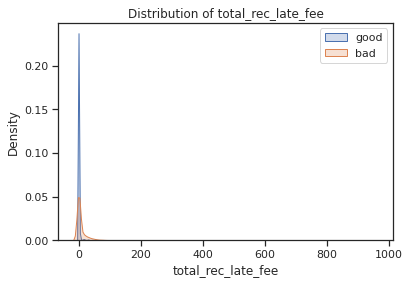

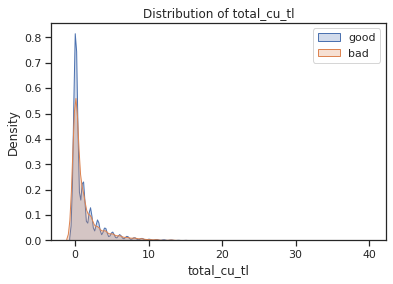

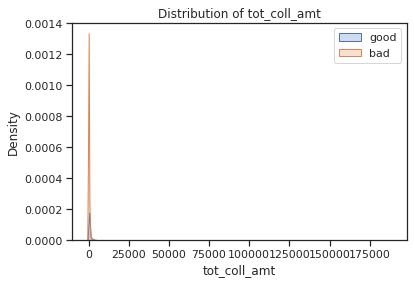

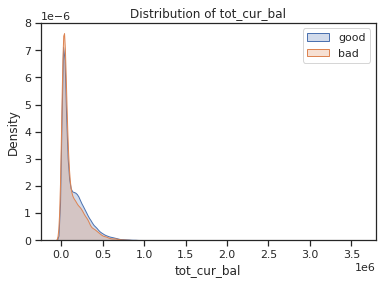

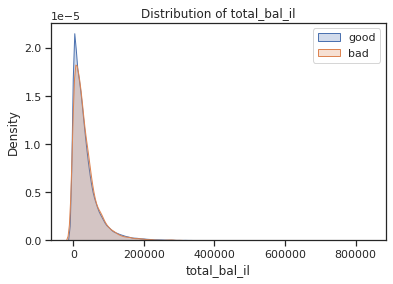

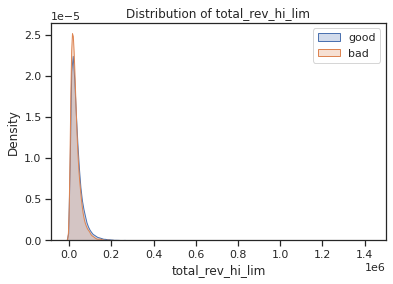

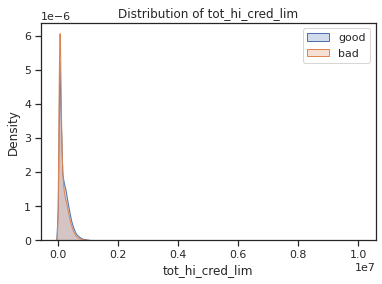

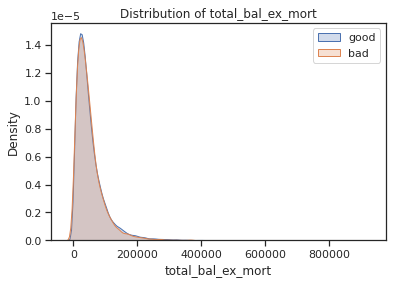

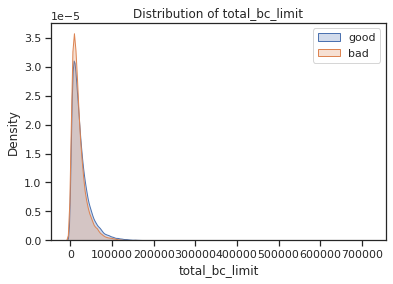

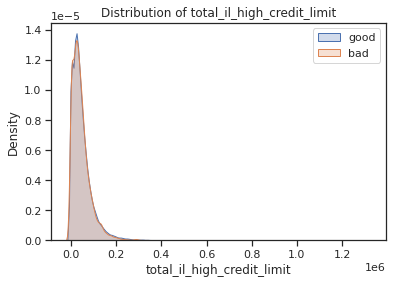

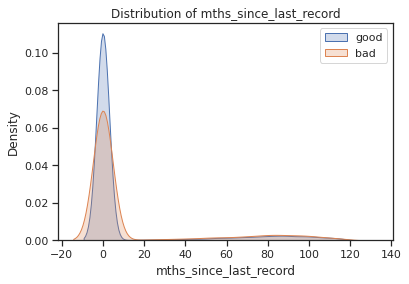

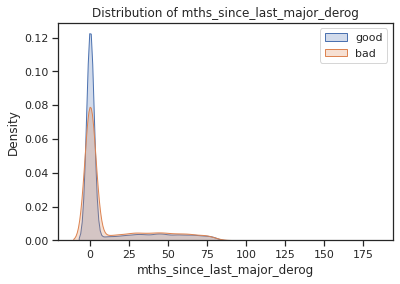

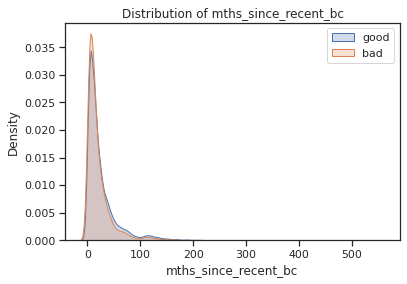

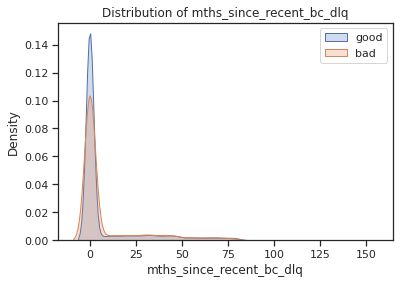

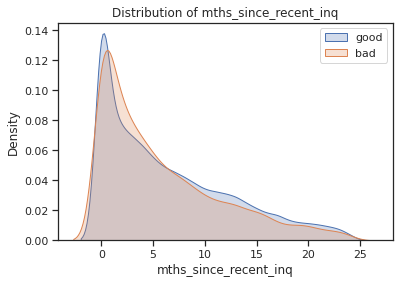

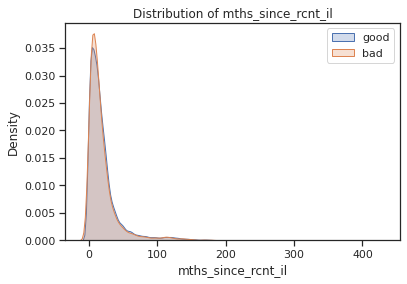

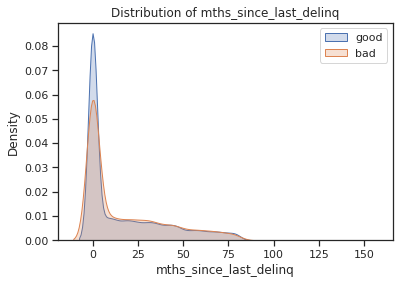

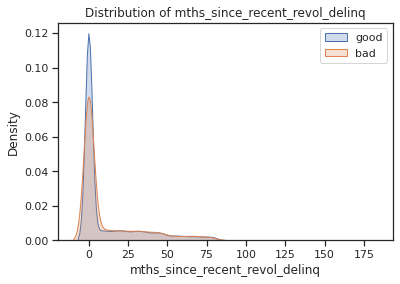

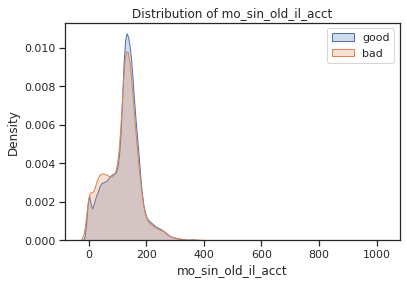

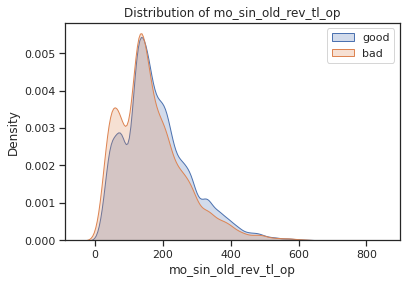

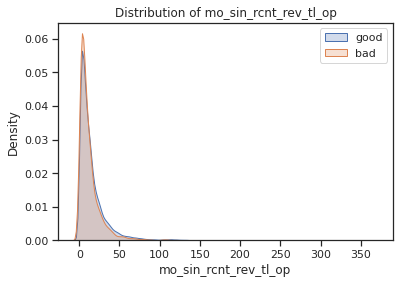

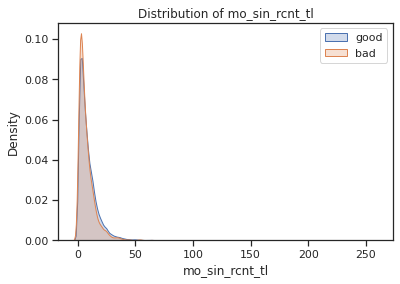

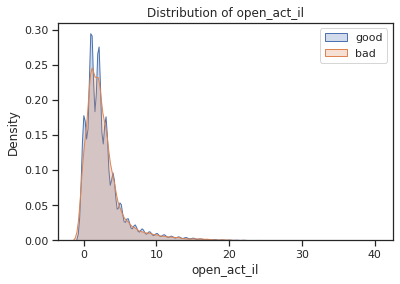

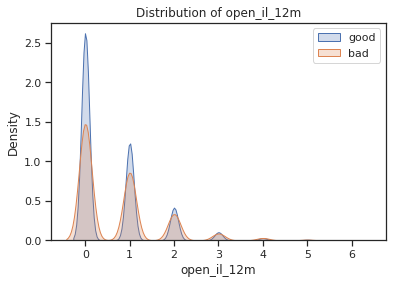

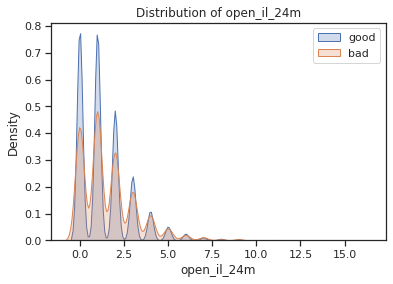

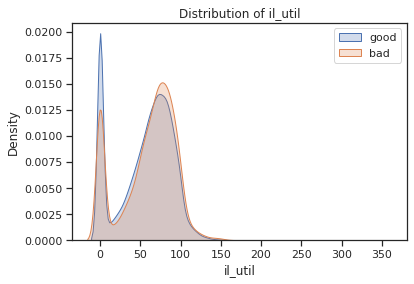

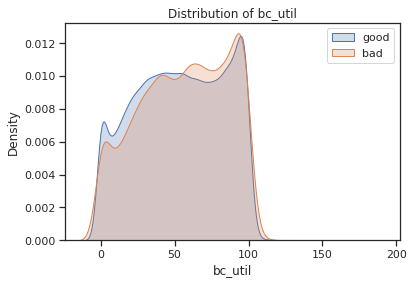

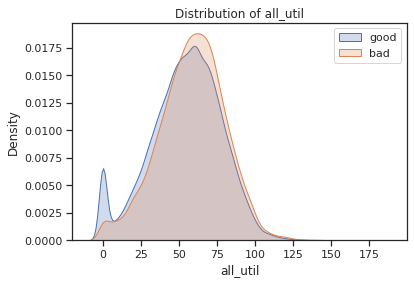

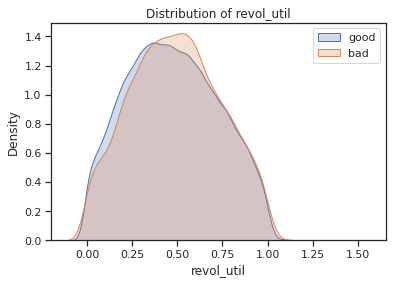

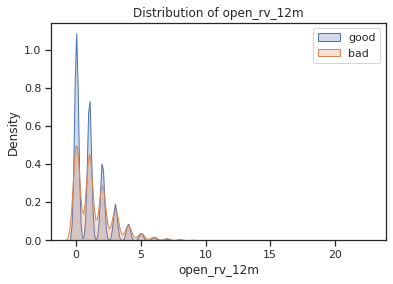

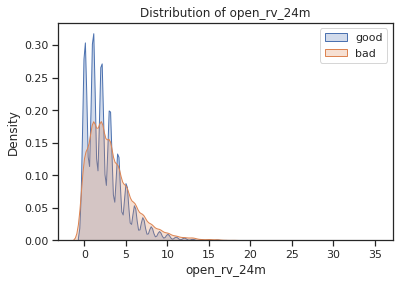

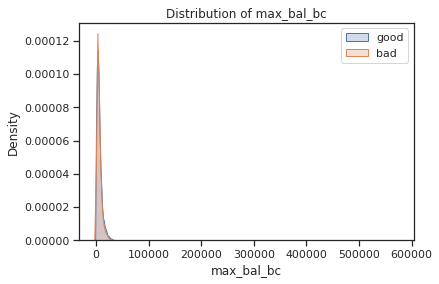

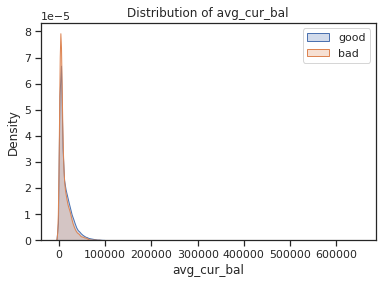

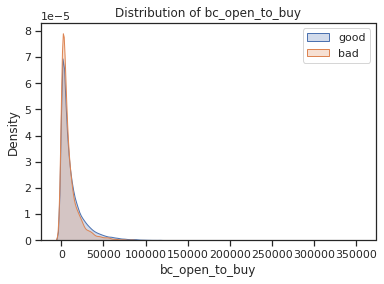

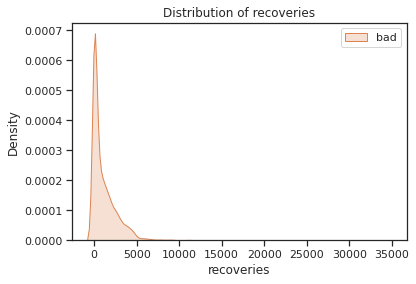

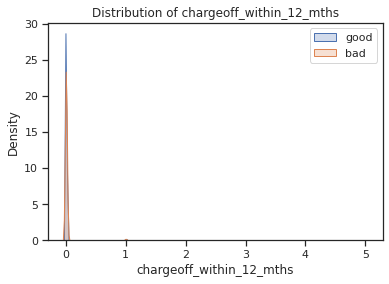

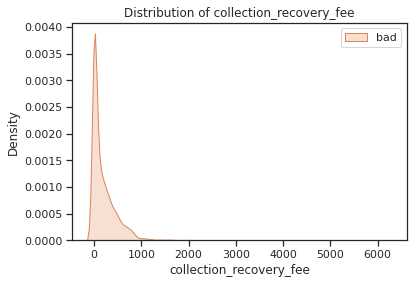

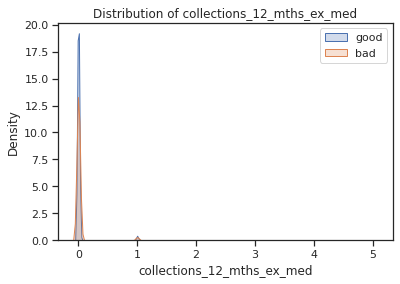

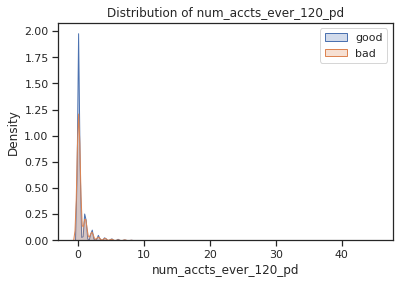

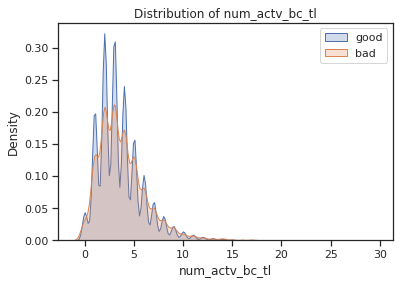

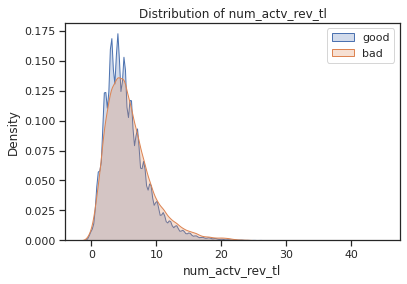

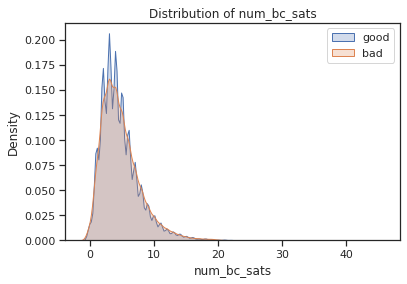

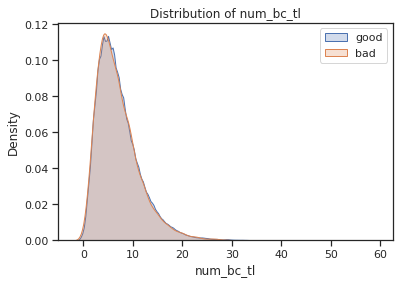

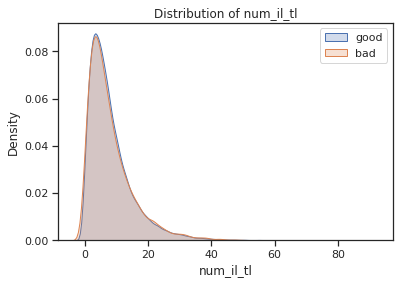

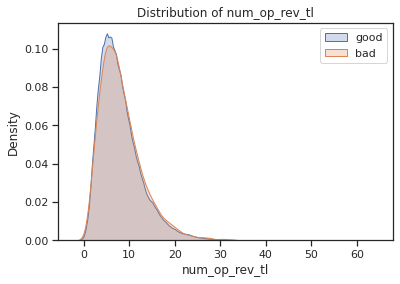

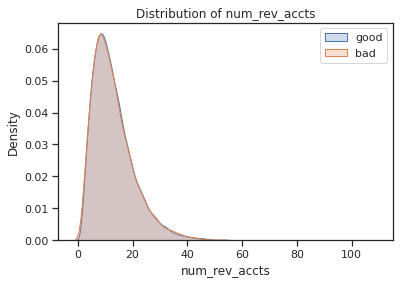

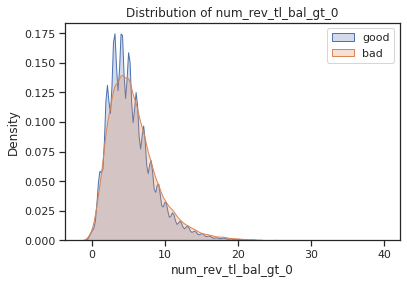

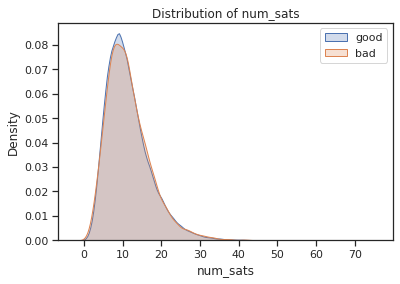

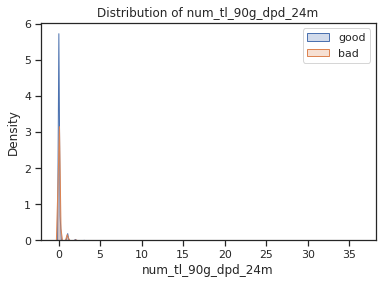

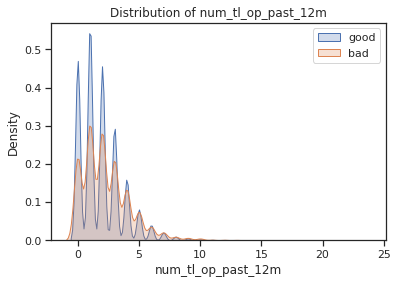

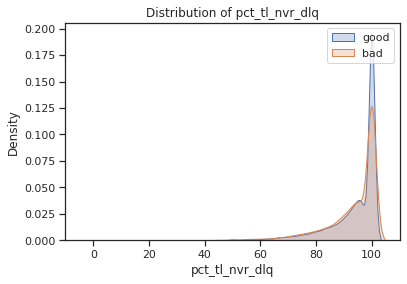

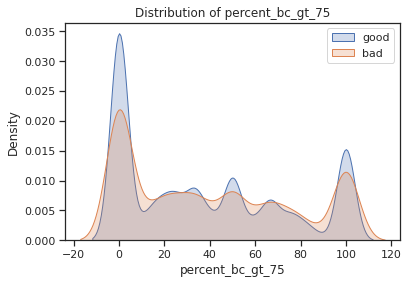

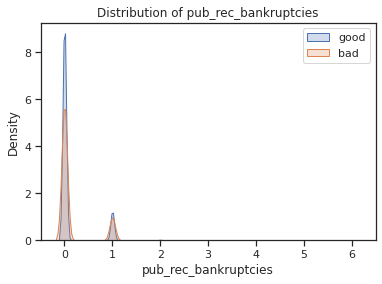

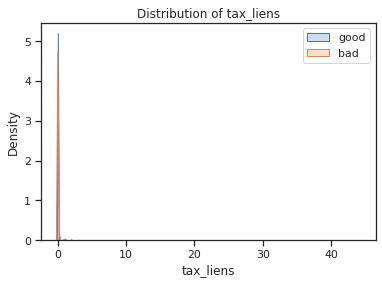

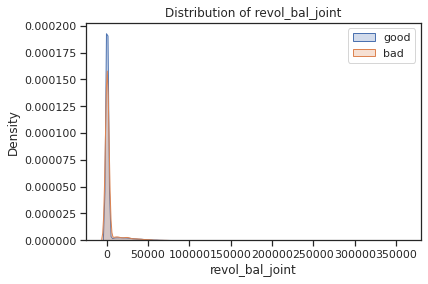

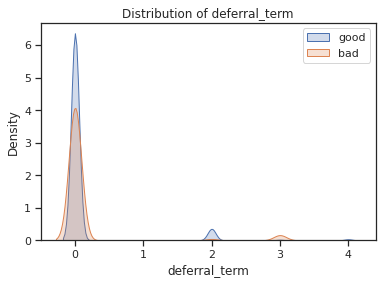

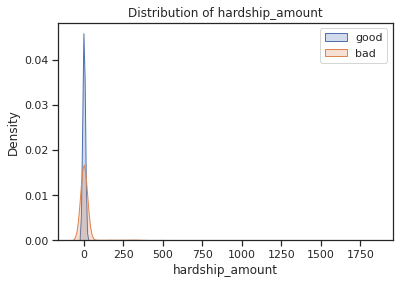

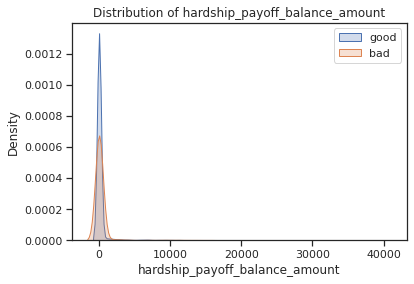

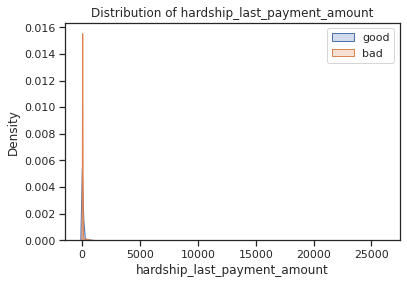

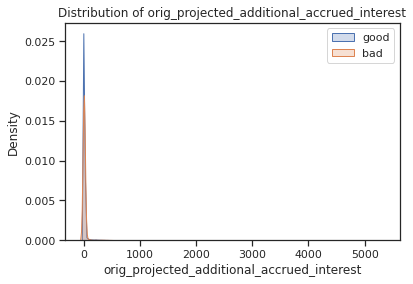

In [ ]:
numerical_data.fillna(0)#for analyzing purpose only
#visualitatiosn for numerical data
good_loan = data_frame_nan.loc[(data_frame.loan_status.str.strip()== 'Fully Paid') | (data_frame.loan_status.str.strip()== 'Current')] 
bad_loan = data_frame_nan.loc[(data_frame.loan_status.str.strip()=='Charged Off') | (data_frame.loan_status.str.strip()== 'Late (31-120 days)') |
                              (data_frame.loan_status.str.strip()== 'In Grace Period') | (data_frame.loan_status.str.strip()== 'Late (16-30 days)') 
                              | (data_frame.loan_status.str.strip()== 'Default')]

# KDE plots

for column in numerical_data:
    #make sure that plot only takes the two plots below by using the following command
    plt.figure()
    # produce a plot for each incomelabel so they interlink
    sns.kdeplot(data=good_loan[column],label="good", shade=True)
    sns.kdeplot(data=bad_loan[column], label="bad",shade=True)
    #include a legend
    plt.legend()
    #include a dynamic title
    plt.title("Distribution of " +column)
    #Save the plot to the working directory
    #plt.savefig(column+'.jpg')

#Observations on data viz of numerical data before cleaning
1. It can be observed that most fields do not provide any insightful information for decision making.
2. Some fields like fico_range_low,fico_range_high, last_fico_range_high,last_fico_range_low provide valuable information. Generally fico range of 670 to 739 are considered good credit. So, in KDE plots it can be observed that 600 to 800 range is having high probability density of good loan.
3. loan_amnt,installment,dti,mort_acc,open_acc,total_acc,total_rec_int,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_tl,open_act_il,bc_util,revol-util,avg_cur_bal,bc_open_to_buy,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_sats fields are conatining almost similar denisties. This indicates that these factors may not affect the decision making.
4. Recoveries and collection_recover_fee are considered bad loans. Because these are avilable only if the customer is a defaulter. While training the model this fileds should be removed so as to decrease the bias for the model prediction.
5. The fields cannot be analysed at this point of time, but can be used for compariosn after processing the data.

In [ ]:
#Categorical data
categorical_data = data_frame.select_dtypes(include =["object"])
#categorical_data_columns = categorical_data.columns
categorical_data.describe()

emp_title application_type  ... hardship_status initial_list_status
count      71297            77159  ...            4491               77159
unique     28185                2  ...               4                   2
top      Teacher       Individual  ...          ACTIVE                   w
freq        1658            67777  ...            3570               61477

[4 rows x 15 columns]

In [ ]:
#missing values percentage in numerical data
categorical_data.isnull().sum()
categorical_missing_fractions = categorical_data.isnull().mean().sort_values(ascending=False)
(categorical_missing_fractions*100).head(6)

hardship_status              94.179551
hardship_type                94.179551
hardship_reason              94.179551
verification_status_joint    87.844581
emp_title                     7.597299
hardship_flag                 2.108633
dtype: float64

#Observations on missing values percentage for categorical data
1. Out of 15 categorical features 6 fields have null values ranging from 2 to 94%

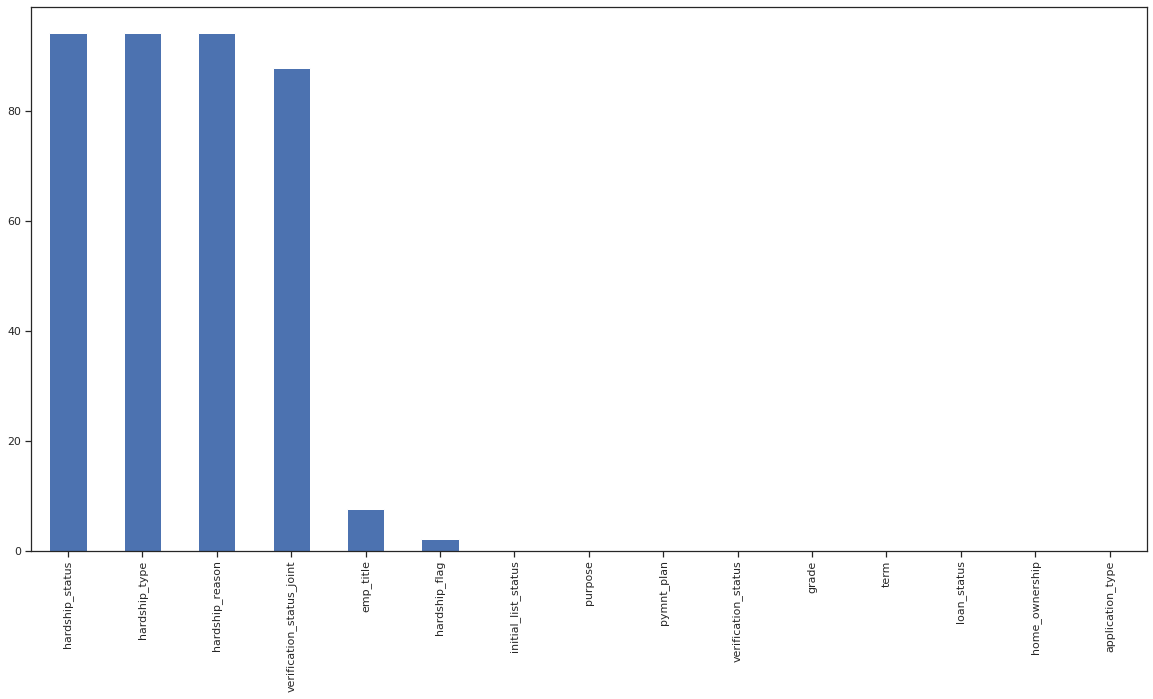

In [ ]:
categorical_graph = categorical_missing_fractions*100
plt.figure(figsize=(20,10))
categorical_graph.plot(kind ="bar")
plt.show()

In [ ]:
#viz cat data
# Count plots

for column in categorical_data:
    #make sure that plot only takes the two plots below by using the following command
    plt.figure(figsize=(10,4))
    plt.xticks(rotation=90) 
    # produce a plot for each incomelabel so they interlink
    sns.countplot(x=column, hue='loan_status', palette="coolwarm", data=data_frame_nan)
    #include a legent
    plt.legend()
    #include a dynamic title
    plt.title("Distribution of " +column)
    #Save the plot to the working directory
    #plt.savefig(column+'.jpg')

#Observations from categorical data visualisation

1. application_type shows that individuals are more likely to pay loans compared to joint applicants.

2. home_ownership shows that customers with rent and mortgage are paying loans compared to own home. But, there is a chance of late in case of rent and mortgage. Whereas, in own ownership the risk of late is likely low.

3. loan_status illustrates that mostly customers are paying loans with little proportions of late and default cases.

4. term indicates that payment of loans is likely high with 36 months comapred to 60 months. This is to be further researched/analyzed as practically higher term periods will have less risk and high payments.

5. grade inidcates that grade types of c,d,a,b are most informative in analyzing the loan status compared to others.

6. verified indcates that eventhough source is not verified it is almost similar to source verified. This needs further analysis as risk of loan default will be more if source is not verified in practical cases.

7. purpose indicates that loan taken for debt consolidation and credit card payment occupies major chunk with home improvement and others following them in minor proportions.

In [ ]:
#Date type data
date_data = data_frame.select_dtypes(include =["datetime64"])
date_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of panda

earliest_cr_line  ... payment_plan_start_date
count                 77159  ...                    4491
unique                  622  ...                      36
top     2005-09-01 00:00:00  ...     2020-04-01 00:00:00
freq                    665  ...                    2392
first   1934-04-01 00:00:00  ...     2017-06-01 00:00:00
last    2014-11-01 00:00:00  ...     2020-07-01 00:00:00

[6 rows x 5 columns]

In [ ]:
#missing values percentage in date data
date_data.isnull().sum()
date_missing_fractions = date_data.isnull().mean().sort_values(ascending=False)
(date_missing_fractions*100).head(5)

payment_plan_start_date    94.179551
next_pymnt_d               56.899390
last_pymnt_d                0.000000
issue_d                     0.000000
earliest_cr_line            0.000000
dtype: float64

#Observations from date data
1. Out of 5 features 2 features are having 56 and 94% null percatnges.
2. date type data can be removed as it is trivial to include date type which may not give useful insights

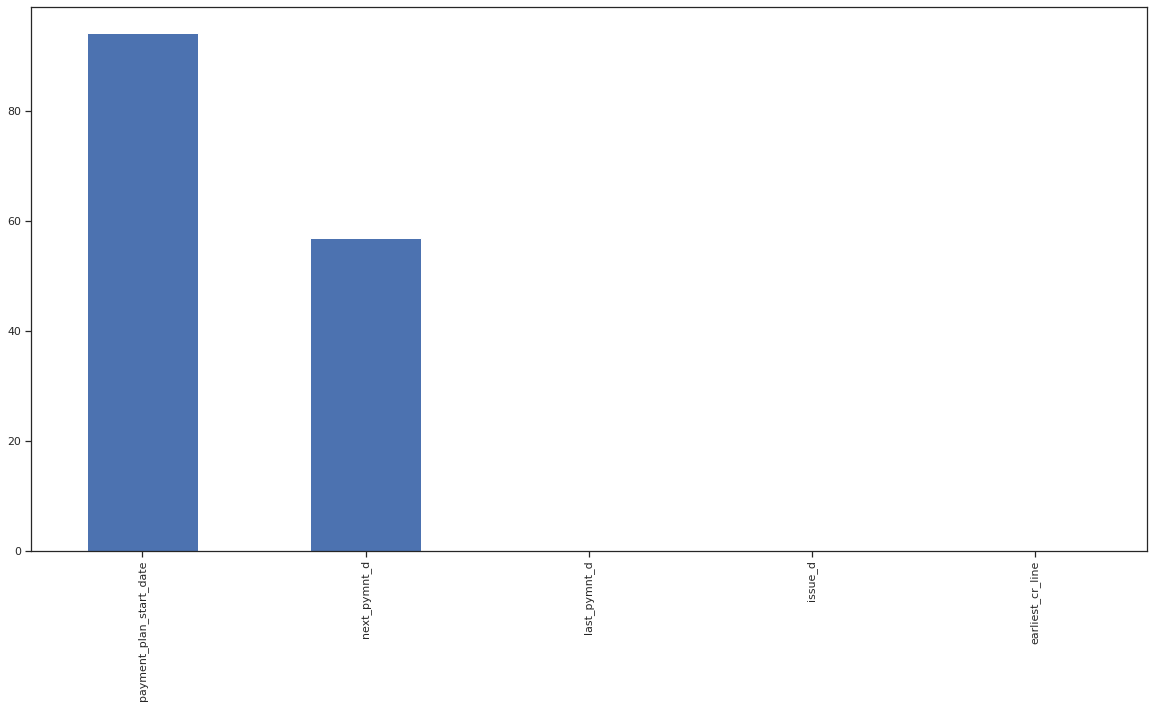

In [ ]:
date_graph = date_missing_fractions*100
plt.figure(figsize=(20,10))
date_graph.plot(kind ="bar")
plt.show()

Charged Off


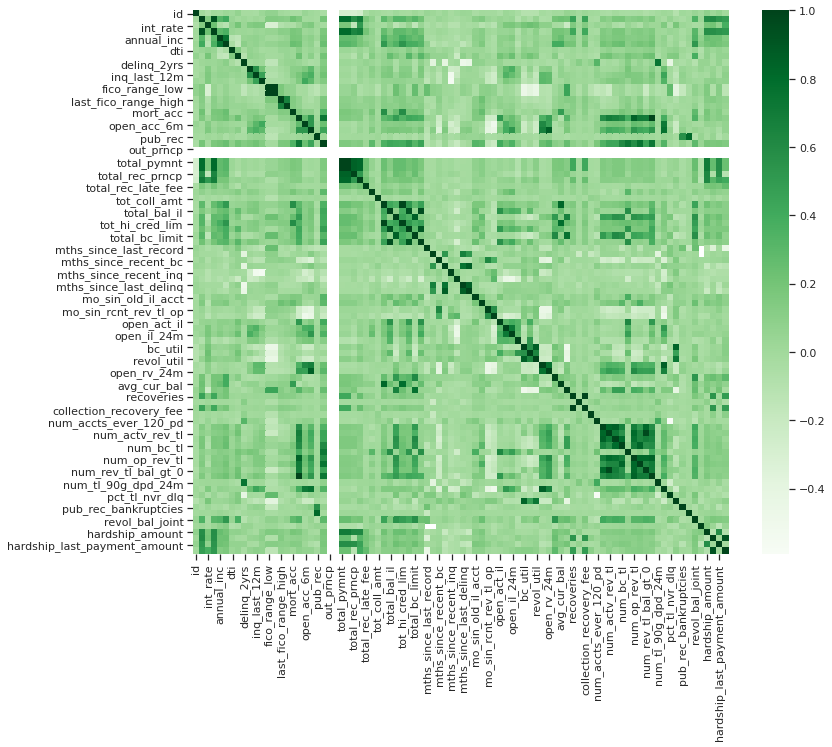

--------------------------
Current


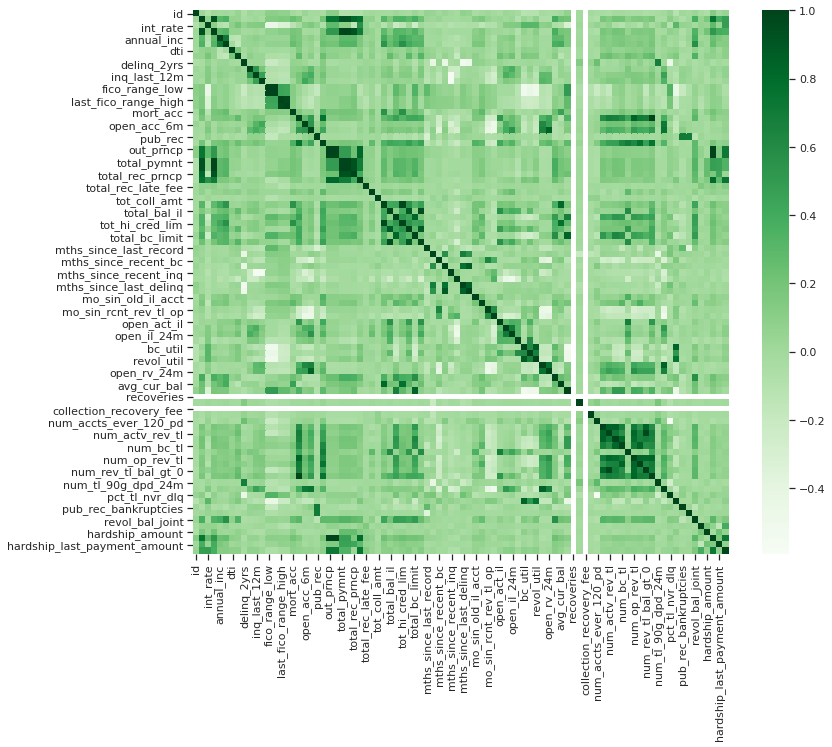

--------------------------
Default


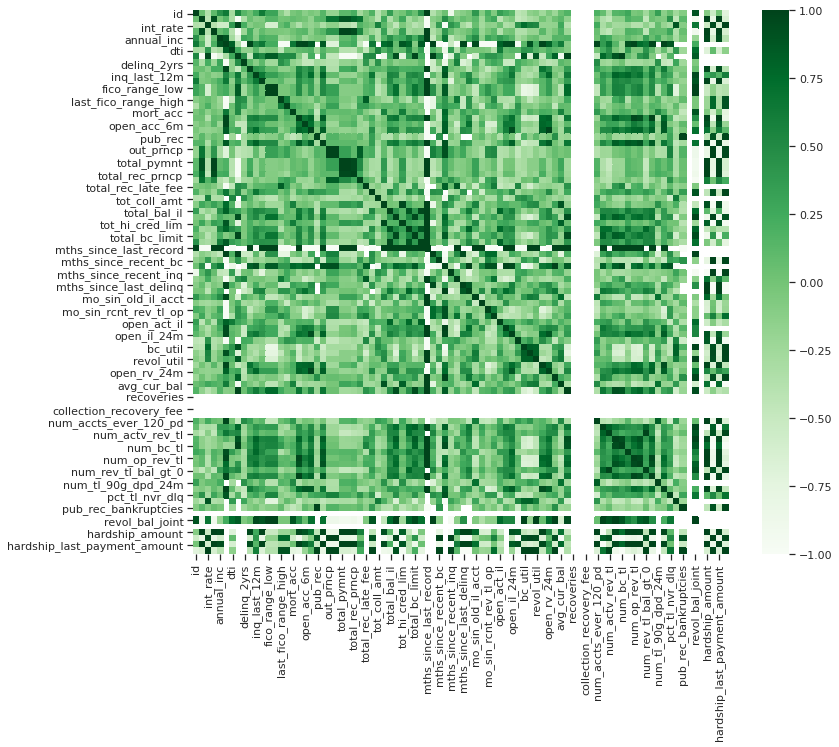

--------------------------
Fully Paid


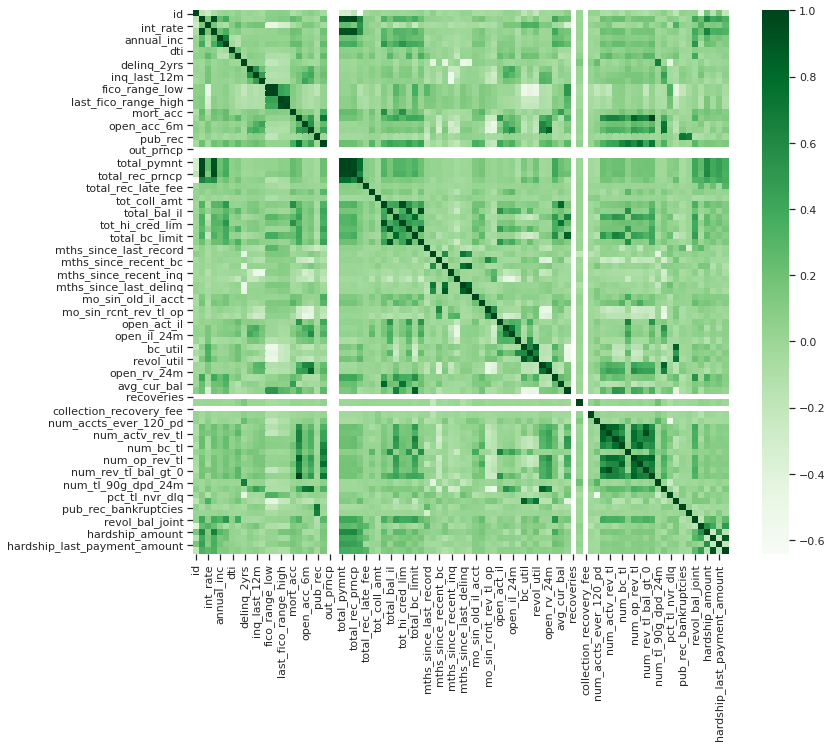

--------------------------
In Grace Period


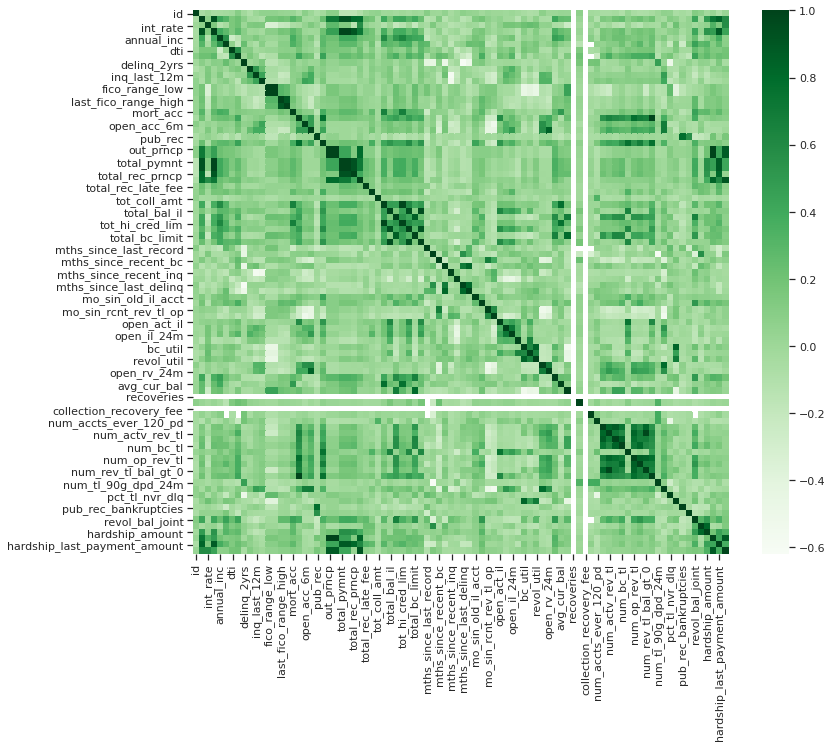

--------------------------
Late (16-30 days)


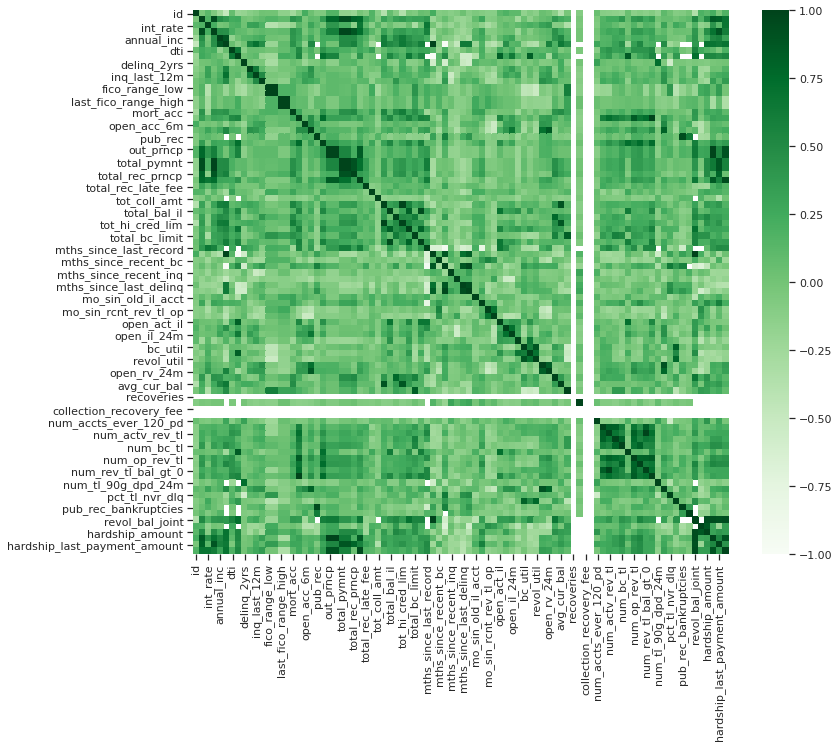

--------------------------
Late (31-120 days)


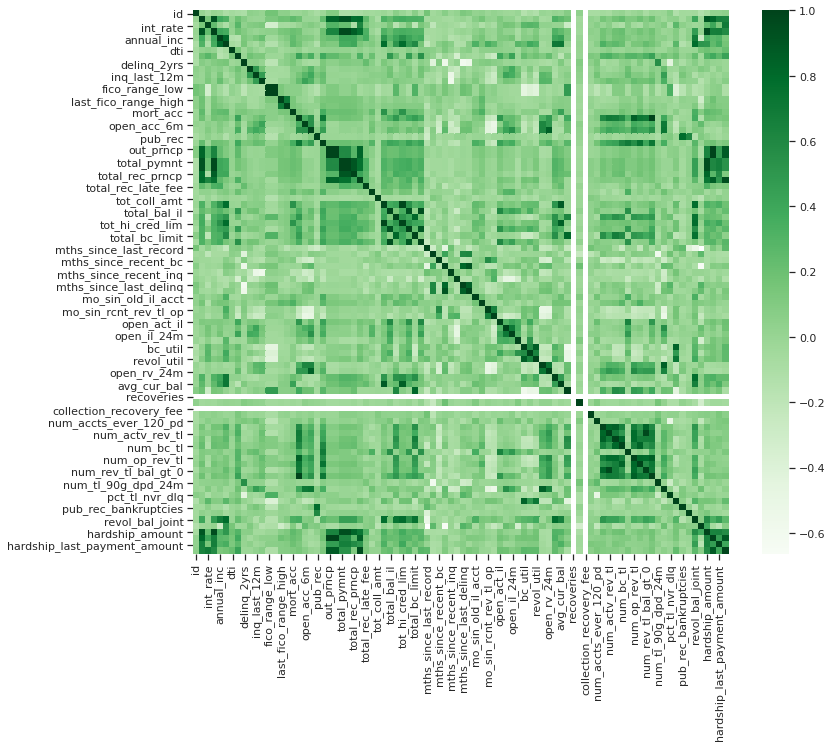

--------------------------


In [ ]:
#Grouping by loan status
#code referred from https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

grouped = data_frame.groupby("loan_status")

for name,group in grouped:
   print (name)
   plt.figure(figsize=(12,10))
   sns.heatmap(group.corr(), annot=False, cmap=plt.cm.Greens)
   plt.show()
   print ("--------------------------")

In [ ]:
#Grouping by loan status
#code referred from https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

grouped = data_frame.groupby("loan_status")

for name,group in grouped:
   print (name)
   print (group.corr().describe())
   print ("--------------------------")

Charged Off
              id  ...  orig_projected_additional_accrued_interest
count  86.000000  ...                                   86.000000
mean   -0.007066  ...                                    0.095399
std     0.129199  ...                                    0.197241
min    -0.293772  ...                                   -0.434301
25%    -0.033128  ...                                   -0.003039
50%    -0.008568  ...                                    0.064390
75%     0.015029  ...                                    0.110057
max     1.000000  ...                                    1.000000

[8 rows x 88 columns]
--------------------------
Current
              id  ...  orig_projected_additional_accrued_interest
count  86.000000  ...                                   86.000000
mean    0.009992  ...                                    0.113689
std     0.118676  ...                                    0.198284
min    -0.112461  ...                                   -0.066126
25%   

#Observations of grouped data with correlations
1. It was observed that each target class is having different correlation matrices
2. This inicates that class imblance exists and missing data for each class is not consistent.

# Pre processing 
1. Dropping features with more than 50% missing values
2. Using transformermixin to impute data(categorical with most frequent one and numerical with mean)
3. Encoding categorical data
4. Feature selection using ranking algorithm.
5. Removing highly correlated features
6. Outlier detection using IsolationForest

In [ ]:
#Dropping features with more than 50% values
null_values = data_frame.isna().sum()
data_frame.isna().mean().sort_values(ascending=False)

hardship_status               0.941796
payment_plan_start_date       0.941796
hardship_reason               0.941796
hardship_type                 0.941796
deferral_term                 0.941796
                                ...   
total_bal_ex_mort             0.000000
total_bc_limit                0.000000
total_il_high_credit_limit    0.000000
mo_sin_old_rev_tl_op          0.000000
id                            0.000000
Length: 108, dtype: float64

In [ ]:
#Placing an limit on null percentage
# Creating a limit on permitting 50% of null values in a data field

limit_value = 0.50 * len(data_frame)
limit_value

38579.5

In [ ]:
# Cleaning data which contains 50% null values in a data field using logical indexing
cleaned_data=data_frame[data_frame.columns[null_values < limit_value]]
cleaned_data.shape

(77159, 89)

#Observations after removing features with more than 50% null values
1. data set is reduced to 89, which indicates reduce in data dimensionality.
2. data should be treated further for feeding the information to the model

In [ ]:
#Imputation using TransformerMixing
#imputing lab style
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#Define the data to be filled as X, we can pass the whole data frame and apply our new class
X = cleaned_data
xt = DataFrameImputer().fit_transform(X)

print('before...')
#Let us see missing value for the train data before
missing_val_count_by_column = (X.isnull().sum())
print('Missing columns for the data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

#and after
print('after...')
missing_val_count_by_column = (xt.isnull().sum())
print('Missing columns for the data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

table = missing_val_count_by_column[missing_val_count_by_column>0]

before...
Missing columns for the data:
 emp_title                 5862
hardship_flag             1627
dti                        108
inq_fi                    2495
inq_last_12m              2495
open_acc_6m               2495
total_cu_tl               2495
total_bal_il              2495
mths_since_recent_bc      1047
mths_since_recent_inq     9243
mths_since_rcnt_il        4879
mo_sin_old_il_acct        2437
open_act_il               2495
open_il_12m               2495
open_il_24m               2495
il_util                  13262
bc_util                   1154
all_util                  2511
revol_util                 103
open_rv_12m               2495
open_rv_24m               2495
max_bal_bc                2495
avg_cur_bal                  7
bc_open_to_buy            1116
pct_tl_nvr_dlq               5
percent_bc_gt_75          1119
dtype: int64
after...
Missing columns for the data:
 Series([], dtype: int64)


In [ ]:
#describing imputed data
imputed_data_frame = xt
imputed_data_frame.describe()

id     loan_amnt  ...  pub_rec_bankruptcies     tax_liens
count  7.715900e+04  77159.000000  ...          77159.000000  77159.000000
mean   1.152632e+08  15156.519978  ...              0.127866      0.038829
std    2.033129e+07   9749.195616  ...              0.346214      0.352836
min    1.227221e+06   1000.000000  ...              0.000000      0.000000
25%    1.141658e+08   7800.000000  ...              0.000000      0.000000
50%    1.178768e+08  12175.000000  ...              0.000000      0.000000
75%    1.248023e+08  20000.000000  ...              0.000000      0.000000
max    1.264174e+08  40000.000000  ...              6.000000     44.000000

[8 rows x 75 columns]

In [ ]:
#encoding categorical data
!pip install category_encoders

     |████████████████████████████████| 81kB 5.0MB/s 


In [ ]:
#encoding
import category_encoders as ce

#We establish the Ordinal encoder which will convert each categorical label to a number
# We specify the columns we want to transform, we ask it to handle missing values if any and also to return a dataframe instead of an np array
enc = ce.OrdinalEncoder(cols=imputed_data_frame.columns,handle_missing='return_nan',return_df= True)

#We now fit the model and transform the data and put it in X which is a dataframe
categorical_encoded_data=enc.fit_transform(imputed_data_frame)
categorical_encoded_data.head(10)
#categorical_encoded_data.select_dtypes(include="object").describe()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


id  emp_title  ...  pub_rec_bankruptcies  tax_liens
0   1.0        1.0  ...                   1.0        1.0
1   2.0        2.0  ...                   2.0        1.0
2   3.0        3.0  ...                   1.0        1.0
3   4.0        4.0  ...                   2.0        1.0
4   5.0        5.0  ...                   1.0        1.0
5   6.0        6.0  ...                   1.0        1.0
6   7.0        7.0  ...                   1.0        1.0
7   8.0        3.0  ...                   1.0        1.0
8   9.0        8.0  ...                   1.0        1.0
9  10.0        9.0  ...                   1.0        1.0

[10 rows x 89 columns]

In [ ]:
#oulier detection
#imported the implementation of this algorihm from sklearn
#code taken from Lab3_CleaningPractice_Sols(2)
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=len(categorical_encoded_data), random_state = 100, contamination= "auto")
preds = clf.fit_predict(categorical_encoded_data)
#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)
outliers_percentage = round((totalOutliers/len(categorical_encoded_data)*100),2)
print("Total percentage of outliers identified is: ", outliers_percentage ,"%")

Total number of outliers identified is:  334
Total percentage of outliers identified is:  0.43 %


#Observations till oulier detection
1. Total percentage of outliers detected is 0.43%, whic is very negligible.
2. Ouliers are not treated as the percentage is too low to affect the model.

In [ ]:
#Feature selection using ranking algorithm
#taking all except target variables
target_excluded_data = categorical_encoded_data.drop(columns="loan_status")
target_excluded_data

id  emp_title  ...  pub_rec_bankruptcies  tax_liens
0          1.0        1.0  ...                   1.0        1.0
1          2.0        2.0  ...                   2.0        1.0
2          3.0        3.0  ...                   1.0        1.0
3          4.0        4.0  ...                   2.0        1.0
4          5.0        5.0  ...                   1.0        1.0
...        ...        ...  ...                   ...        ...
77154  77155.0    28183.0  ...                   1.0        1.0
77155  77156.0    28184.0  ...                   1.0        1.0
77156  77157.0       69.0  ...                   1.0        1.0
77157  77158.0      522.0  ...                   1.0        1.0
77158  77159.0    28185.0  ...                   1.0        1.0

[77159 rows x 88 columns]

In [ ]:
#placing target variable in other variable
target_only_data = categorical_encoded_data.loan_status
target_only_data

0        1.0
1        2.0
2        3.0
3        1.0
4        1.0
        ... 
77154    3.0
77155    3.0
77156    1.0
77157    1.0
77158    1.0
Name: loan_status, Length: 77159, dtype: float64

In [ ]:
#Using ranking algorithm for feature selection
#using mutual_info_classifier from Lab4-FeaturesAdultPracticeSols
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# configure to select all features
selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(target_excluded_data,target_only_data)

In [ ]:
#Retrieve the column names for the selected columns
names = target_excluded_data.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores*100))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
ns_df_sorted.head(60)

Feat_names  Mutual_info
33                   out_prncp    64.992094
34               out_prncp_inv    64.691943
37             total_rec_prncp    61.009941
25         last_fico_range_low    23.190832
24        last_fico_range_high    23.143799
70     collection_recovery_fee    22.075436
68                  recoveries    21.889029
35                 total_pymnt     8.951902
36             total_pymnt_inv     8.555806
38               total_rec_int     5.081612
5                     int_rate     4.815924
16               hardship_flag     4.344597
7                  installment     3.731339
63                 open_rv_12m     3.225138
64                 open_rv_24m     3.069125
20                inq_last_12m     3.013703
28                 open_acc_6m     2.948429
58                 open_il_24m     2.934669
57                 open_il_12m     2.777005
39          total_rec_late_fee     2.740698
19                      inq_fi     2.649512
43                total_bal_il     2.471171
40                 total_cu_tl     2.437557
8                        grade     2.348392
61                    all_util     2.296960
65                  max_bal_bc     2.244466
56                 open_act_il     2.199718
51          mths_since_rcnt_il     1.457454
6                         term     1.213507
32         initial_list_status     1.023009
11                last_pymnt_d     0.842787
29        acc_open_past_24mths     0.739003
83          num_tl_op_past_12m     0.725753
21              inq_last_6mths     0.694710
14                  pymnt_plan     0.656399
10                     issue_d     0.646952
86        pub_rec_bankruptcies     0.644566
54       mo_sin_rcnt_rev_tl_op     0.643372
80         num_rev_tl_bal_gt_0     0.639182
4                    loan_amnt     0.630940
71  collections_12_mths_ex_med     0.630436
3               home_ownership     0.627107
9             earliest_cr_line     0.608590
69    chargeoff_within_12_mths     0.583192
44            total_rev_hi_lim     0.567177
2             application_type     0.566093
22              fico_range_low     0.565701
13         verification_status     0.565672
82          num_tl_90g_dpd_24m     0.502773
55              mo_sin_rcnt_tl     0.480909
50       mths_since_recent_inq     0.460697
87                   tax_liens     0.460446
47              total_bc_limit     0.452763
26                    mort_acc     0.419199
23             fico_range_high     0.405374
1                    emp_title     0.392245
15                     purpose     0.386299
59                     il_util     0.367140
46           total_bal_ex_mort     0.351017
18                 delinq_2yrs     0.332775

In [ ]:
len(ns_df_sorted)

88

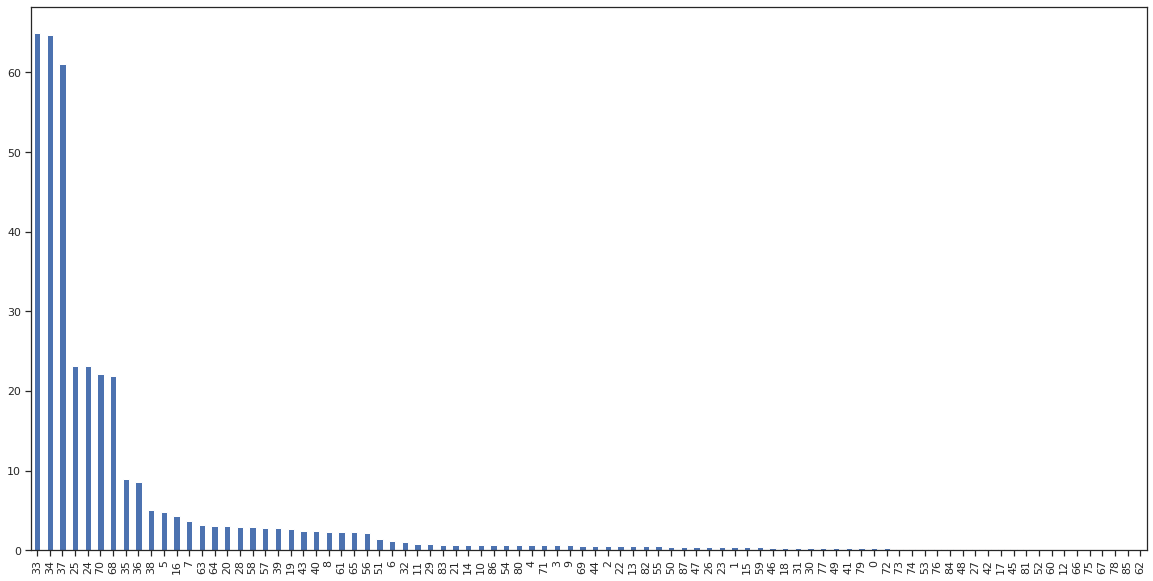

In [ ]:
plt.figure(figsize=(20,10))
ns_df_sorted.Mutual_info.plot(kind="bar")
plt.show()

In [ ]:
top_features_data_columns = ns_df_sorted.Feat_names[ns_df_sorted.Mutual_info > 0.32]
top_features_data_columns#taking top 70% features with high ranking among of 88 features
print(len(top_features_data_columns))

60


In [ ]:
#best features
top_features_data_columns

33                     out_prncp
34                 out_prncp_inv
37               total_rec_prncp
25           last_fico_range_low
24          last_fico_range_high
70       collection_recovery_fee
68                    recoveries
35                   total_pymnt
36               total_pymnt_inv
38                 total_rec_int
5                       int_rate
16                 hardship_flag
7                    installment
63                   open_rv_12m
64                   open_rv_24m
20                  inq_last_12m
28                   open_acc_6m
58                   open_il_24m
57                   open_il_12m
39            total_rec_late_fee
19                        inq_fi
43                  total_bal_il
40                   total_cu_tl
8                          grade
61                      all_util
65                    max_bal_bc
56                   open_act_il
51            mths_since_rcnt_il
6                           term
32           initial_list_status
11        

# Observations after feature selection
1. The size of data set is reduced to 60 inclusing target feature.
2. Top 70% features are only considered
3. Also, only top 70% have some weightage for ranking.

#Correlation
1. Detecting correlation between variables
2. Removing highly correlated variables


In [ ]:
top_features_array = top_features_data_columns.values

In [ ]:
#using list comprehension to get dataframe containing top features
cols = [col for col in target_excluded_data.columns if col in top_features_array]
top_features_data_frame = target_excluded_data[cols]
top_features_data_frame
target_excluded_data = top_features_data_frame
target_excluded_data.columns

Index(['emp_title', 'application_type', 'home_ownership', 'loan_amnt',
       'int_rate', 'term', 'installment', 'grade', 'earliest_cr_line',
       'issue_d', 'last_pymnt_d', 'verification_status', 'pymnt_plan',
       'purpose', 'hardship_flag', 'delinq_2yrs', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'mort_acc',
       'open_acc_6m', 'acc_open_past_24mths', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'total_cu_tl',
       'total_bal_il', 'total_rev_hi_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'mths_since_recent_inq', 'mths_since_rcnt_il',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'il_util', 'all_util', 'open_rv_12m', 'open_rv_24m',
       'max_bal_bc', 'recoveries', 'chargeoff_within_12_mths',
       'c

In [ ]:
#correlation
correlation_viz_data=target_excluded_data.corr()
c=correlation_viz_data.drop(columns=["last_pymnt_d","pymnt_plan","issue_d","verification_status"])
c

emp_title  ...  tax_liens
emp_title                    1.000000  ...  -0.009113
application_type            -0.034136  ...  -0.018753
home_ownership              -0.028667  ...  -0.000657
loan_amnt                    0.021234  ...  -0.006499
int_rate                     0.062635  ...  -0.015508
term                         0.042978  ...  -0.011811
installment                  0.093682  ...  -0.011106
grade                       -0.001109  ...  -0.004052
earliest_cr_line                  NaN  ...        NaN
issue_d                           NaN  ...        NaN
last_pymnt_d                      NaN  ...        NaN
verification_status          0.015501  ...   0.004786
pymnt_plan                        NaN  ...        NaN
purpose                     -0.012648  ...   0.004646
hardship_flag               -0.001807  ...   0.008504
delinq_2yrs                 -0.004579  ...   0.005413
inq_fi                       0.014717  ...   0.013153
inq_last_12m                -0.013762  ...   0.017958
inq_last_6mths               0.001855  ...   0.010786
fico_range_low              -0.002011  ...  -0.030410
fico_range_high             -0.002011  ...  -0.030410
last_fico_range_high        -0.011026  ...  -0.008022
last_fico_range_low         -0.011057  ...  -0.008015
mort_acc                    -0.004146  ...  -0.017083
open_acc_6m                  0.002779  ...  -0.004114
acc_open_past_24mths        -0.000894  ...   0.004690
initial_list_status          0.017541  ...   0.004301
out_prncp                    0.083514  ...   0.005278
out_prncp_inv                0.084855  ...   0.005505
total_pymnt                  0.300515  ...  -0.004728
total_pymnt_inv              0.297463  ...  -0.005077
total_rec_prncp              0.109398  ...   0.006327
total_rec_int                0.299787  ...  -0.001700
total_rec_late_fee           0.026948  ...   0.003993
total_cu_tl                  0.016827  ...  -0.009489
total_bal_il                 0.188905  ...   0.002447
total_rev_hi_lim             0.035196  ...  -0.009798
total_bal_ex_mort            0.253070  ...  -0.005310
total_bc_limit               0.023199  ...  -0.012747
mths_since_recent_inq        0.009784  ...  -0.020066
mths_since_rcnt_il          -0.020841  ...  -0.000619
mo_sin_rcnt_rev_tl_op        0.002799  ...  -0.013043
mo_sin_rcnt_tl               0.001502  ...  -0.007636
open_act_il                  0.007300  ...  -0.019208
open_il_12m                  0.017955  ...  -0.004743
open_il_24m                 -0.003533  ...  -0.000298
il_util                     -0.003039  ...  -0.000480
all_util                    -0.024972  ...  -0.000761
open_rv_12m                  0.012212  ...   0.017121
open_rv_24m                 -0.000421  ...   0.008403
max_bal_bc                   0.070192  ...  -0.001869
recoveries                   0.037869  ...   0.002932
chargeoff_within_12_mths     0.004649  ...   0.002245
collection_recovery_fee      0.037850  ...   0.002563
collections_12_mths_ex_med  -0.002816  ...   0.011687
num_rev_tl_bal_gt_0          0.006604  ...  -0.003032
num_tl_90g_dpd_24m          -0.001390  ...  -0.004280
num_tl_op_past_12m          -0.003656  ...   0.005152
pub_rec_bankruptcies        -0.011448  ...   0.031531
tax_liens                   -0.009113  ...   1.000000

[60 rows x 56 columns]

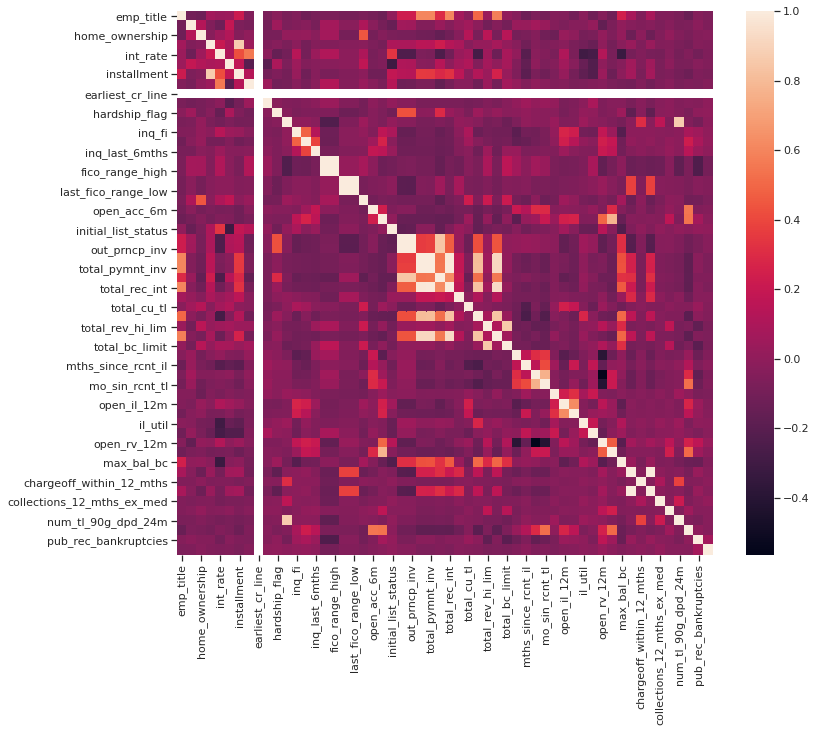

In [ ]:
#heatmap for correlation
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(c.corr())
plt.show()

#Observations during correlation
1. it is observed that earliest_cr_line,last_pymnt_d,issue_d,pymnt_plan affects the correlation(having no correaltion at all)
2. This is due to the reason that earliest_cr_line and last_pymnt_d and pymnt_plan are of data type
3. This can be removed before imputaion but are not removed in order to analyze for any anamolies due to them.

In [ ]:
'''post_correlation_viz_data = correlation_viz_data.drop(columns=["earliest_cr_line","last_pymnt_d","pymnt_plan","issue_d"])
plt.figure(figsize=(12,10))
sns.heatmap(post_correlation_viz_data.corr())
plt.show()
print(post_correlation_viz_data.shape)'''

'post_correlation_viz_data = correlation_viz_data.drop(columns=["earliest_cr_line","last_pymnt_d","pymnt_plan","issue_d"])\nplt.figure(figsize=(12,10))\nsns.heatmap(post_correlation_viz_data.corr())\nplt.show()\nprint(post_correlation_viz_data.shape)'

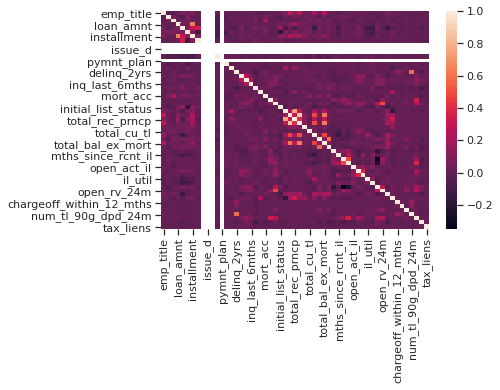

In [ ]:
#removing highly correlated features which are higher than 0.9
columns = np.full((correlation_viz_data.shape[0],), True, dtype=bool)
for i in range(correlation_viz_data.shape[0]):
    for j in range(i+1, correlation_viz_data.shape[0]):
        if correlation_viz_data.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = target_excluded_data.columns[columns]
correlated_data= target_excluded_data[selected_columns]
sns.heatmap(correlated_data.corr())


(77159, 50)


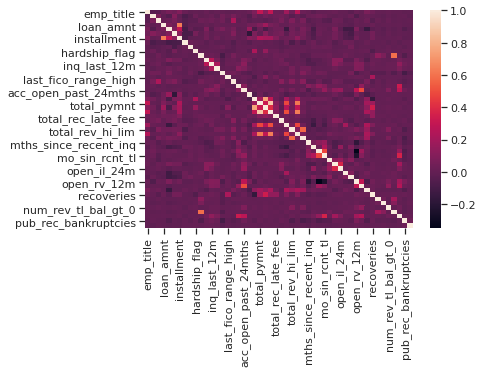

In [ ]:
treated = correlated_data.drop(columns=["last_pymnt_d","pymnt_plan","issue_d","grade","earliest_cr_line"])
sns.heatmap(treated.corr())
print(treated.shape)

In [ ]:
correlated_data = treated
correlated_data.corr()

emp_title  ...  tax_liens
emp_title                    1.000000  ...  -0.009113
application_type            -0.034136  ...  -0.018753
home_ownership              -0.028667  ...  -0.000657
loan_amnt                    0.021234  ...  -0.006499
int_rate                     0.062635  ...  -0.015508
term                         0.042978  ...  -0.011811
installment                  0.093682  ...  -0.011106
verification_status          0.015501  ...   0.004786
purpose                     -0.012648  ...   0.004646
hardship_flag               -0.001807  ...   0.008504
delinq_2yrs                 -0.004579  ...   0.005413
inq_fi                       0.014717  ...   0.013153
inq_last_12m                -0.013762  ...   0.017958
inq_last_6mths               0.001855  ...   0.010786
fico_range_low              -0.002011  ...  -0.030410
last_fico_range_high        -0.011026  ...  -0.008022
mort_acc                    -0.004146  ...  -0.017083
open_acc_6m                  0.002779  ...  -0.004114
acc_open_past_24mths        -0.000894  ...   0.004690
initial_list_status          0.017541  ...   0.004301
out_prncp                    0.083514  ...   0.005278
total_pymnt                  0.300515  ...  -0.004728
total_rec_prncp              0.109398  ...   0.006327
total_rec_int                0.299787  ...  -0.001700
total_rec_late_fee           0.026948  ...   0.003993
total_cu_tl                  0.016827  ...  -0.009489
total_bal_il                 0.188905  ...   0.002447
total_rev_hi_lim             0.035196  ...  -0.009798
total_bal_ex_mort            0.253070  ...  -0.005310
total_bc_limit               0.023199  ...  -0.012747
mths_since_recent_inq        0.009784  ...  -0.020066
mths_since_rcnt_il          -0.020841  ...  -0.000619
mo_sin_rcnt_rev_tl_op        0.002799  ...  -0.013043
mo_sin_rcnt_tl               0.001502  ...  -0.007636
open_act_il                  0.007300  ...  -0.019208
open_il_12m                  0.017955  ...  -0.004743
open_il_24m                 -0.003533  ...  -0.000298
il_util                     -0.003039  ...  -0.000480
all_util                    -0.024972  ...  -0.000761
open_rv_12m                  0.012212  ...   0.017121
open_rv_24m                 -0.000421  ...   0.008403
max_bal_bc                   0.070192  ...  -0.001869
recoveries                   0.037869  ...   0.002932
chargeoff_within_12_mths     0.004649  ...   0.002245
collections_12_mths_ex_med  -0.002816  ...   0.011687
num_rev_tl_bal_gt_0          0.006604  ...  -0.003032
num_tl_90g_dpd_24m          -0.001390  ...  -0.004280
num_tl_op_past_12m          -0.003656  ...   0.005152
pub_rec_bankruptcies        -0.011448  ...   0.031531
tax_liens                   -0.009113  ...   1.000000

[50 rows x 50 columns]

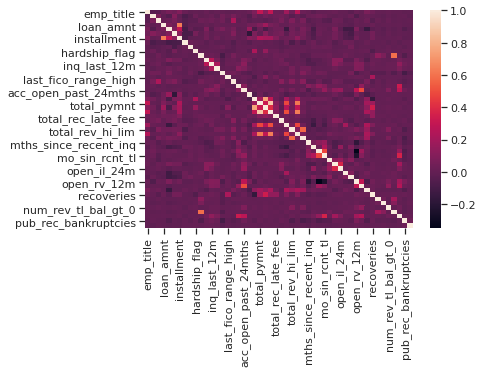

In [ ]:

sns.heatmap(correlated_data.corr())

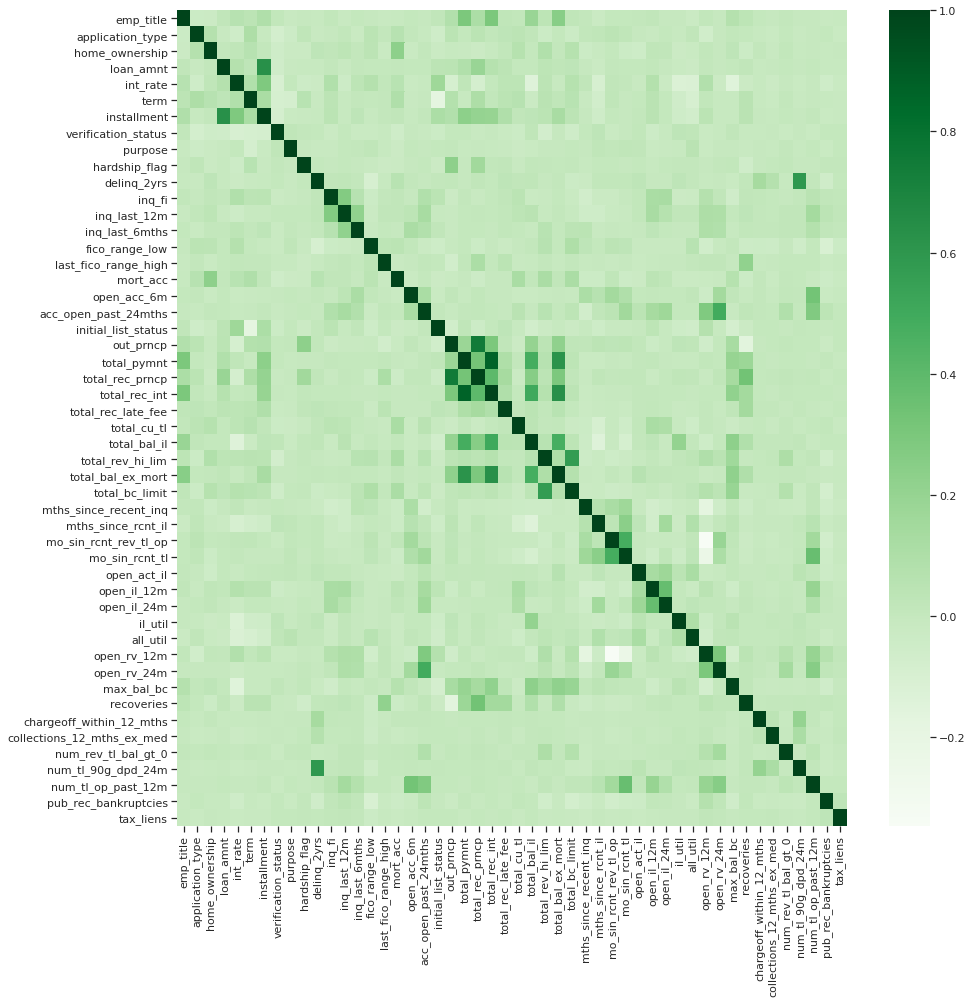

(77159, 50)


In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(correlated_data.corr(), annot=False, cmap=plt.cm.Greens)
plt.show()
print(correlated_data.shape)

In [ ]:
#outlier detection
#oulier detection
#imported the implementation of this algorihm from sklearn
#code taken from Lab3_CleaningPractice_Sols(2)
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=len(correlated_data), random_state = 100, contamination= "auto")
preds = clf.fit_predict(correlated_data)
#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)
outliers_percentage = round((totalOutliers/len(categorical_encoded_data)*100),2)
print("Total percentage of outliers identified is: ", outliers_percentage ,"%")

Total number of outliers identified is:  363
Total percentage of outliers identified is:  0.47 %


#Observations after pre processing
1. the data contains 51 features which are reduced form 108.bit_length
2. outliers percentage before and after correlation are same. So, no need to treat/mask ouliers

# Model development
1. Splitting the data into train and test.
2. Upsampling minor classes of training data
3. Classification

  3.1 Linear svc
  3.2 NaiveBayes
  3.3 stochastic gradient deescent
  3.4 knn classifier
  3.5 decision tree
  3.6 random forest
  3.7 accuracies calculation

4. Cross-validation

  4.1 Linear svc
  4.2 NaiveBayes
  4.3 stochastic gradient deescent
  4.4 knn classifier
  4.5 decision tree
  4.6 random forest
  4.7 accuracies calculation

5. Observations and confusion matrix
6. Performance metrics for classification
7. Clustering  


In [ ]:
#Splitting the data

y=target_only_data
print(y)
#y = pd.DataFrame(data=y, columns=['loan_status'])
#print(y.shape)
x=correlated_data
x

0        1.0
1        2.0
2        3.0
3        1.0
4        1.0
        ... 
77154    3.0
77155    3.0
77156    1.0
77157    1.0
77158    1.0
Name: loan_status, Length: 77159, dtype: float64


emp_title  application_type  ...  pub_rec_bankruptcies  tax_liens
0            1.0               1.0  ...                   1.0        1.0
1            2.0               1.0  ...                   2.0        1.0
2            3.0               1.0  ...                   1.0        1.0
3            4.0               1.0  ...                   2.0        1.0
4            5.0               1.0  ...                   1.0        1.0
...          ...               ...  ...                   ...        ...
77154    28183.0               1.0  ...                   1.0        1.0
77155    28184.0               1.0  ...                   1.0        1.0
77156       69.0               1.0  ...                   1.0        1.0
77157      522.0               1.0  ...                   1.0        1.0
77158    28185.0               1.0  ...                   1.0        1.0

[77159 rows x 50 columns]

In [ ]:
#splitting into train and test
from sklearn.model_selection import train_test_split

# Without stratification divide into first partition and test set.
train_X,test_X, train_y, test_y= train_test_split (x,y, test_size=0.2,random_state=1)

print(train_X.describe())
print(test_X.describe())

          emp_title  application_type  ...  pub_rec_bankruptcies     tax_liens
count  61727.000000      61727.000000  ...          61727.000000  61727.000000
mean    6494.821747          1.121357  ...              1.128453      1.047532
std     8183.085271          0.326544  ...              0.348168      0.385404
min        1.000000          1.000000  ...              1.000000      1.000000
25%      241.500000          1.000000  ...              1.000000      1.000000
50%     2073.000000          1.000000  ...              1.000000      1.000000
75%    11216.500000          1.000000  ...              1.000000      1.000000
max    28185.000000          2.000000  ...              7.000000     15.000000

[8 rows x 50 columns]
          emp_title  application_type  ...  pub_rec_bankruptcies     tax_liens
count  15432.000000      15432.000000  ...          15432.000000  15432.000000
mean    6496.904614          1.122538  ...              1.125778      1.042963
std     8123.277333          

#Observations after splitting
Train set : 61727
Test set  : 15432

1.0    27441
3.0    25588
2.0     7718
5.0      541
4.0      356
6.0       70
7.0       13
Name: loan_status, dtype: int64


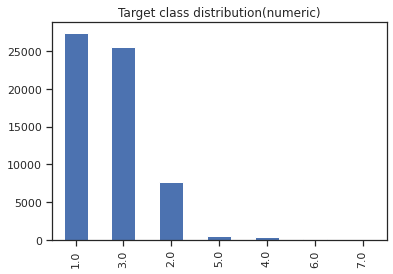

In [ ]:
#getting target variable for viz

plotPurpose = train_y.value_counts()

print(plotPurpose)
plt.title('Target class distribution(numeric)')
plotPurpose.plot(kind="bar")

           emp_title  application_type  ...      tax_liens    loan_status
count  192087.000000     192087.000000  ...  192087.000000  192087.000000
mean     6105.121252          1.151692  ...       1.038795       4.000000
std      8207.213666          0.358723  ...       0.327027       2.000005
min         1.000000          1.000000  ...       1.000000       1.000000
25%       110.000000          1.000000  ...       1.000000       2.000000
50%      1531.000000          1.000000  ...       1.000000       4.000000
75%     10348.000000          1.000000  ...       1.000000       6.000000
max     28185.000000          2.000000  ...      15.000000       7.000000

[8 rows x 51 columns]


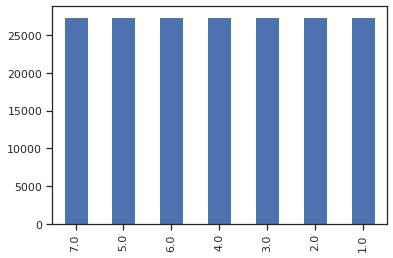

In [ ]:
#Balancing data
#Balancing the data

#after balancing
from sklearn.utils import resample

#The first thing is contatenate our training data back together.  
resampling = train_X.copy()
resampling['loan_status']= train_y.values

# separate minority and majority classes
majority_class = resampling[resampling['loan_status']== (1.0)]
#repititive step 1
minority_class_2 = resampling[resampling['loan_status']== (2.0)]

# Upsample minority class
minority_upsampled_2 = resample(minority_class_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=27441,     # to match majority class
                                 random_state=123) # reproducible results
#repititive step 1
#repititive step 2
minority_class_3 = resampling[resampling['loan_status']== (3.0)]

# Upsample minority class
minority_upsampled_3 = resample(minority_class_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=27441,     # to match majority class
                                 random_state=123) # reproducible results
#repititive step 2
#repititive step 3
minority_class_4 = resampling[resampling['loan_status']== (4.0)]

# Upsample minority class
minority_upsampled_4 = resample(minority_class_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=27441,     # to match majority class
                                 random_state=123) # reproducible results
#repititive step 3
#repititive step 4
minority_class_5 = resampling[resampling['loan_status']== (5.0)]

# Upsample minority class
minority_upsampled_5 = resample(minority_class_5, 
                                 replace=True,     # sample with replacement
                                 n_samples=27441,     # to match majority class
                                 random_state=123) # reproducible results
#repititive step 4
#repititive step 5
minority_class_6 = resampling[resampling['loan_status']== (6.0)]

# Upsample minority class
minority_upsampled_6 = resample(minority_class_6, 
                                 replace=True,     # sample with replacement
                                 n_samples=27441,     # to match majority class
                                 random_state=123) # reproducible results
#repititive step 5
#repititive step 6
minority_class_7 = resampling[resampling['loan_status']== (7.0)]

# Upsample minority class
minority_upsampled_7 = resample(minority_class_7, 
                                 replace=True,     # sample with replacement
                                 n_samples=27441,     # to match majority class
                                 random_state=123) # reproducible results
#repititive step 6
# Combine majority class with upsampled minority class
upsampled = pd.concat([majority_class, minority_upsampled_2,
                       minority_upsampled_3,minority_upsampled_4,
                       minority_upsampled_5,minority_upsampled_6,minority_upsampled_7])

# Show dataset statistics
print(upsampled.describe())
 
# Display new class counts
upsampled.loan_status.value_counts()
upsampled.loan_status.value_counts().plot(kind="bar")

In [ ]:
#Classification models
#codes are taken from Lab4_Classification_Practice_Sols
upsampled
upsampled_x = upsampled.drop(columns="loan_status")
upsampled_x
train_X = upsampled_x
print(train_X)

upsampled_y = upsampled['loan_status']
upsampled_y
train_y = upsampled_y
print(train_y)


       emp_title  application_type  ...  pub_rec_bankruptcies  tax_liens
53654    20916.0               1.0  ...                   1.0        1.0
33680      626.0               1.0  ...                   1.0        1.0
20606        3.0               1.0  ...                   1.0        1.0
43740        3.0               1.0  ...                   1.0        1.0
76447      348.0               1.0  ...                   1.0        1.0
...          ...               ...  ...                   ...        ...
8800         3.0               1.0  ...                   1.0        1.0
44326       55.0               1.0  ...                   3.0        1.0
8964       313.0               2.0  ...                   1.0        1.0
19757      386.0               1.0  ...                   1.0        1.0
72434       12.0               2.0  ...                   1.0        1.0

[192087 rows x 50 columns]
53654    1.0
33680    1.0
20606    1.0
43740    1.0
76447    1.0
        ... 
8800     7.0
44326

In [ ]:
#classifier 1
#LinerSVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_X, train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#classifier 2
#NaiveBayes

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_X, train_y);

In [ ]:
#classifier 3
#stochastic gradient deescent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y);

In [ ]:
#classifier 4
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=10)
clf_knn=clf_nn
clf_knn.fit(train_X,train_y)
y_hat = clf_knn.predict(test_X)
y_hat


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(test_y, y_hat)
print('calculated accuracy:',accuracy)


calculated accuracy: 0.861132711249352


In [ ]:
#classifier 5
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

random_variable = RandomForestClassifier(max_depth=100)

random_variable.fit(train_X,train_y)

new_random_variable = random_variable.predict(test_X)

new_random_variable


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy2 = accuracy_score(test_y, new_random_variable)
print('Sklearn calculated accuracy:',accuracy2)

Sklearn calculated accuracy: 0.973950233281493


In [ ]:
#classifier 6
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=100)

decision_tree.fit(train_X,train_y)

new_decision_tree = decision_tree.predict(test_X)

decision_tree


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy3 = accuracy_score(test_y, new_decision_tree)
print('Sklearn calculated accuracy:',accuracy3)

Sklearn calculated accuracy: 0.9408372213582167


In [ ]:
#scores
#comparison of classifiers

from sklearn.metrics import accuracy_score

classifiers = [svc, sgd,  naive_bayes ,clf_nn,decision_tree, random_variable]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores,2)

print(classifiers[index])
print("highest score",round(scores[index],2))
accuracy_percentage = (round(scores[index],2))*100
print("ACCURACY PERCENTAGE FOR CLASSIFIER ",accuracy_percentage,"%") 

[0.6624546397096941, 0.57983411093831, 0.7509720062208398, 0.861132711249352, 0.9408372213582167, 0.973950233281493] 2
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
highest score 0.97
ACCURACY PERCENTAGE FOR CLASSIFIER  97.0 %


In [ ]:
#Scores
print(scores)
scores
from statistics import mean
#code taken from https://www.geeksforgeeks.org/find-average-list-python/
print(mean(scores))

[0.6624546397096941, 0.57983411093831, 0.7509720062208398, 0.861132711249352, 0.9408372213582167, 0.973950233281493]
0.7948634871263176


#Observations after applying data on classifiers
1. It is found that stochastic gradient descent has the accuracy close to total average of all accuracies of classifiers
2. The least is LinearSVc and the highest is random forest classifier
3. The high accuracy of random forest classifier is beacuse it is an ensemble algorithm. This is only an assumption and needs further research.
4. Linear svc takes more time compared to all other considred algorithms.
5. Knn and random forest is taking less time compared to others.

In [ ]:
#features for cross-validation
#top 20 features from ranking algorithm


#Cross-validation


In [ ]:
top_20_features_columns =['emp_title', 'application_type', 'home_ownership', 'loan_amnt',
       'int_rate', 'term', 'installment', 'grade', 'verification_status',
       'hardship_flag', 'delinq_2yrs', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'mort_acc',
       'open_acc_6m']

In [ ]:
'''from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#generate the permuations of the parameters.
from itertools import permutations, combinations

features_to_use = ['emp_title', 'application_type', 'home_ownership', 'loan_amnt',
       'int_rate', 'term', 'installment', 'grade', 'verification_status',
       'hardship_flag', 'delinq_2yrs', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'fico_range_low', 'fico_range_high',
       'last_fico_range_high', 'last_fico_range_low', 'mort_acc',
       'open_acc_6m']#selecting only top 20 features

criterion_parameter = list(combinations(features_to_use, 18))#best combinations of 18 features
print(criterion_parameter)


accuracies = []
for feature_set in criterion_parameter:
    # get the position of the indexes to the features
    index_map = [features_to_use.index(feature) for feature in feature_set]

    #pass in a smaller set of the whole train to limit params, by selecting the appropriate columns.
    X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(train_X.iloc[:, index_map], train_y)

    #build classifier with our current parameter.
    clf_tree_cv = DecisionTreeClassifier()
    
    #fit our parameterised model to the cross-validated data.
    clf_tree_cv.fit(X_train_cv, y_train_cv)

    #obtain predictions on the cv test set.
    y_hat_cv = clf_tree_cv.predict(X_test_cv)

    #append the accuracies to the list of all of them.
    accuracies.append(accuracy_score(y_test_cv, y_hat_cv))

'''

In [ ]:


criterion=['emp_title', 'application_type', 'home_ownership', 'loan_amnt','int_rate', 
 'term', 'installment', 'grade', 'verification_status','hardship_flag', 
 'delinq_2yrs', 'inq_fi', 'inq_last_12m','inq_last_6mths', 'fico_range_low',
 'fico_range_high','last_fico_range_high', 'last_fico_range_low', 'mort_acc','open_acc_6m']

len(criterion)

In [ ]:
index_map=[1,3,4,5,6,8,9,10,11,13,14,15,16,17,18,20,22,23]
index_map

[1, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 20, 22, 23]

In [ ]:
#classification after cross-validation
#classifier 1 after cross-validation
#codes are taken from Lab4_Classification_Practice_Sols
#classifier 1
#LinerSVC

from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(train_X.iloc[:, index_map], train_y);

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#classifier 2 after cross-validation
#NaiveBayes

from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(train_X.iloc[:, index_map], train_y);

In [ ]:
#classifier 3 after cross-validation
#stochastic gradient deescent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X.iloc[:, index_map], train_y);

In [ ]:
#classifier 4 after cross-validation
#knn classifier
from sklearn.neighbors import KNeighborsClassifier

clf_nn = KNeighborsClassifier(n_neighbors=10)
clf_knn=clf_nn
clf_knn.fit(train_X.iloc[:, index_map],train_y)
y_hat = clf_knn.predict(test_X.iloc[:, index_map])
y_hat


from sklearn.metrics import accuracy_score

#we can use the built in accuracy metrics in sklearn.
accuracy = accuracy_score(test_y, y_hat)
print('calculated accuracy:',accuracy)

calculated accuracy: 0.8848496630378434


In [ ]:
#classifier 5 after cross-validation
#decision tree classifier
# train the classifier using the best feature set.
clf_dt = DecisionTreeClassifier()
clf_dt.fit(train_X.iloc[:, index_map], train_y)

# evaluate the accuracy using the unseen test data.
score = accuracy_score(test_y, clf_dt.predict(test_X.iloc[:, index_map]))
print(score)

0.9384396060134785


In [ ]:
#classifier 6 after cross-validation
#random forest classifier
clf_rf = RandomForestClassifier()
clf_rf.fit(train_X.iloc[:, index_map], train_y)

# evaluate the accuracy using the unseen test data.
score = accuracy_score(test_y, clf_rf.predict(test_X.iloc[:, index_map]))
print("ACCURACY OF CLASSIFIER AFTER CROSS-VALIDATION",round(score,2)*100,"%")

ACCURACY OF CLASSIFIER AFTER CROSS-VALIDATION 97.0 %


In [ ]:
#comparison of classifiers after cross-validation
#scores
#comparison of classifiers

from sklearn.metrics import accuracy_score

classifiers = [svc, sgd,  naive_bayes ,clf_nn,clf_dt, clf_rf]

# for each classifier get the accuracy score
scores = [accuracy_score(clf.predict(test_X.iloc[:, index_map]), test_y) for clf in classifiers]
    
index = np.argmax(scores)

print(scores)

print(classifiers[index])
print("highest score",round(scores[index],2))
accuracy_percentage = (round(scores[index],2))*100
print("ACCURACY PERCENTAGE FOR CLASSIFIER(after cross-validation) ",accuracy_percentage,"%")

[0.8011923276308969, 0.5649948159668222, 0.7444271643338517, 0.8848496630378434, 0.9384396060134785, 0.9705158113011924]
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
highest score 0.97
ACCURACY PERCENTAGE FOR CLASSIFIER(after cross-validation)  97.0 %


In [ ]:
mean(scores)

0.8174032313806808

#Observations after cross-validation 

1. After cross-validation the model accuracy for all classifiers reduced.
2. The accuracies score related to other classifiers is similar to that of holdout method.
3. Randomforest has the most accuracy compared to others after cross-validation





# Metrics evaluation
1. Comparison of classifiers
2. Confusion matrix for best classifier
3. Performance metrics for evaluation

In [ ]:
#Confusion matrix
#confusion matrix
from sklearn.ensemble import RandomForestClassifier
rf = GaussianNB()
rf=rf.fit(train_X, train_y)
rf.predict(test_X)
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score,plot_confusion_matrix, balanced_accuracy_score, f1_score
confMatrix = confusion_matrix(test_y,y_hat)


<Figure size 14400x7200 with 0 Axes>

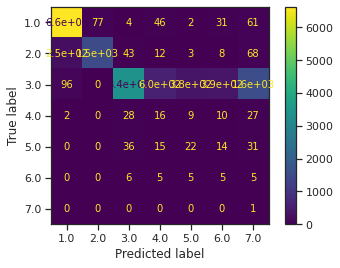

In [ ]:
#plotting
plt.figure(figsize=(200,100))
plot_confusion_matrix(rf,test_X,test_y)
plt.show()

#Discussion on minority class accuracy
1. From confusion mtarix it can be observed that minority classes 4,5,6,7 are predicted with least accuracy.
2. This might be due to the pattern in the dataset predicts majority classes.

In [ ]:
from sklearn.metrics import classification_report

target_lables =['Fully Paid','Charged Off','Current','In Grace Period','Late (31-120 days)','Late (16-30days)','Default']

print(classification_report(test_y,y_hat,target_names =target_lables))

                    precision    recall  f1-score   support

        Fully Paid       0.96      0.97      0.97      6848
       Charged Off       0.88      0.96      0.92      1896
           Current       0.97      0.80      0.88      6451
   In Grace Period       0.02      0.09      0.03        92
Late (31-120 days)       0.02      0.11      0.03       118
  Late (16-30days)       0.01      0.04      0.02        26
           Default       0.00      0.00      0.00         1

          accuracy                           0.88     15432
         macro avg       0.41      0.42      0.41     15432
      weighted avg       0.94      0.88      0.91     15432



In [ ]:
correlated_data.to_csv("LoanLendingProcessedata.csv")

# Clustering

In [ ]:
#the codes are taken from analytics vidhya and udemy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
correlated_data.shape


(77159, 50)

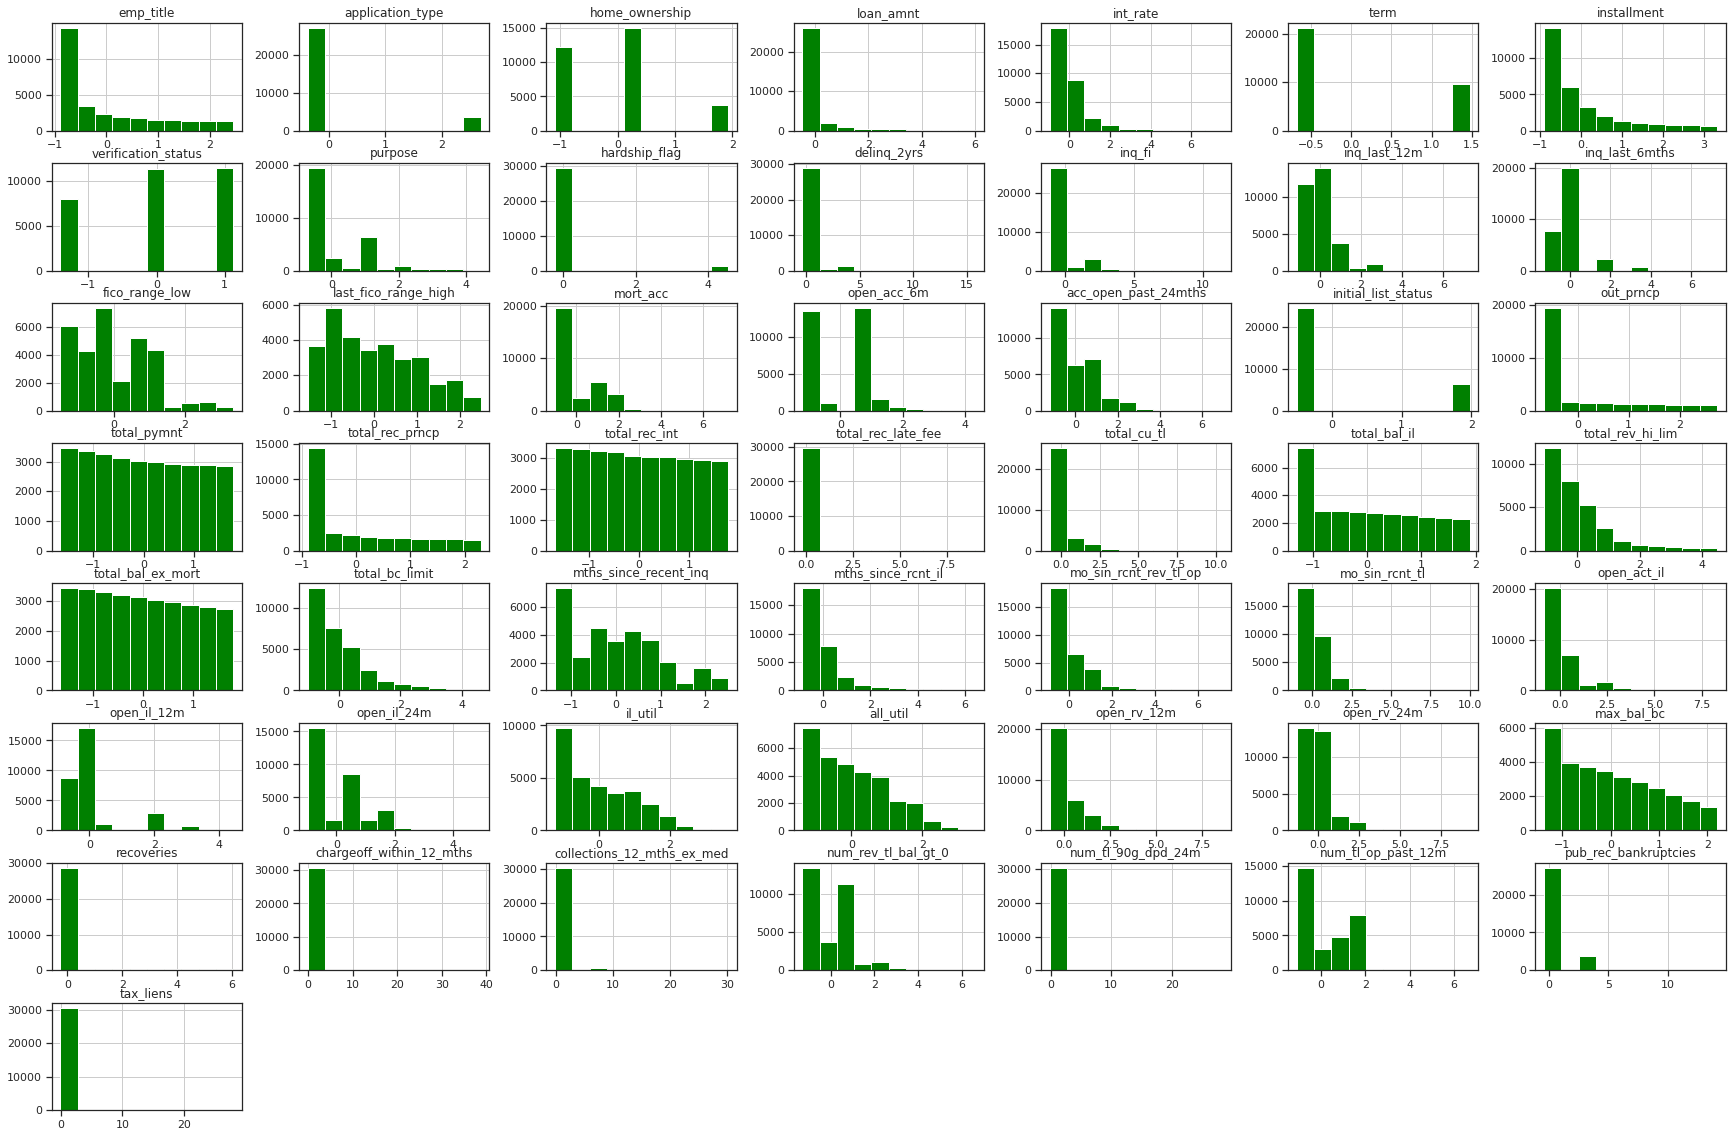

In [ ]:
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(correlated_data.iloc[:30863,:])
standard_df = pd.DataFrame(standard_df)
standard_df.describe()
dataset2 = standard_df
dataset2.columns = correlated_data.columns
# histograms of the variables
dataset2.hist(figsize=(30,20),color = "green")
pyplot.show()

In [ ]:
#t-sne dimensionality reduction
from sklearn.manifold import TSNE
new_df = dataset2
label_data=data_frame['loan_status']

model = TSNE(n_components=2,random_state=0)

tsne_data =model.fit_transform(new_df)

In [ ]:
tsne_data

array([[ 16.804663 ,   4.5149217],
       [  5.2330523, -28.975199 ],
       [ 16.795643 ,   4.6730046],
       ...,
       [-19.060642 , -28.313261 ],
       [-39.38894  , -13.54216  ],
       [-46.329437 ,  23.223633 ]], dtype=float32)

In [ ]:
label_data.iloc[:30863]

label_data = label_data.iloc[:30863]
label_data

0         Fully Paid
1        Charged Off
2            Current
3         Fully Paid
4         Fully Paid
            ...     
30858    Charged Off
30859     Fully Paid
30860     Fully Paid
30861        Current
30862        Current
Name: loan_status, Length: 30863, dtype: object

In [ ]:
tsne_data = np.vstack((tsne_data.T,label_data)).T
tsne_df = pd.DataFrame(data = tsne_data )
tsne_df
#sns.FacetGrid(tsne_df,size=6).map(plt.scatter,"x","y").add.legend()
#plt.show()

0        1            2
0      16.8047  4.51492   Fully Paid
1      5.23305 -28.9752  Charged Off
2      16.7956    4.673      Current
3      5.22915 -28.9903   Fully Paid
4      17.3637  4.89643   Fully Paid
...        ...      ...          ...
30858  22.8473  22.3179  Charged Off
30859  32.4488  16.6649   Fully Paid
30860 -19.0606 -28.3133   Fully Paid
30861 -39.3889 -13.5422      Current
30862 -46.3294  23.2236      Current

[30863 rows x 3 columns]

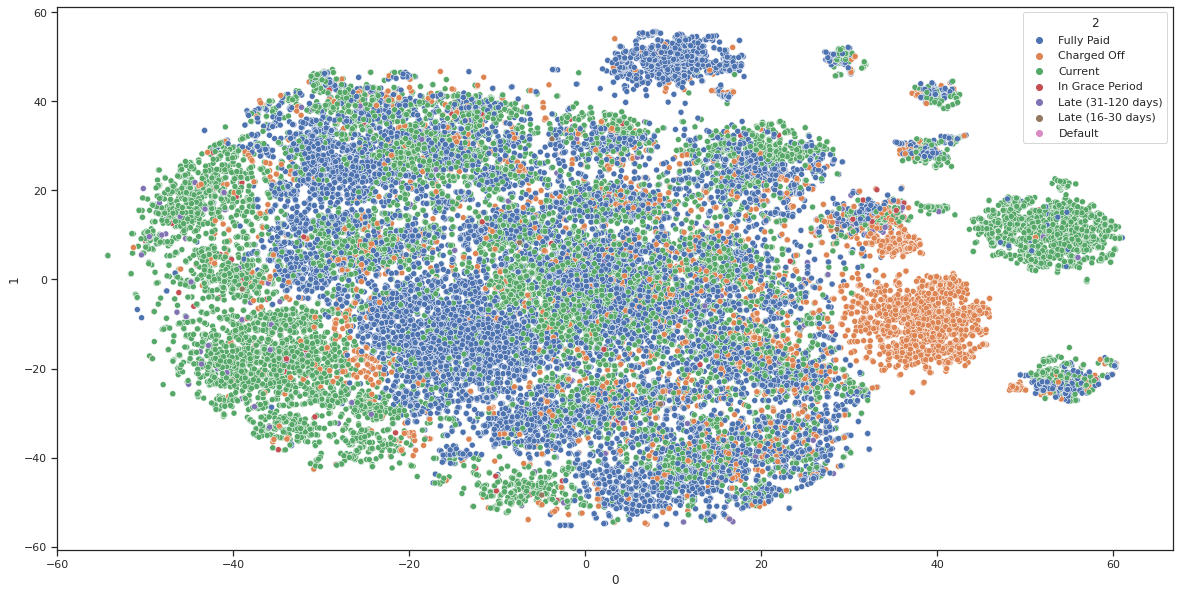

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=tsne_df,x =tsne_df.columns[0],y=tsne_df.columns[1],hue=tsne_df.columns[2])
plt.show()


In [ ]:
type(tsne_df)

# Get names of indexes for which column Age has value 30
indexNames = tsne_df[ tsne_df[2] == "In Grace Period"].index 
# Delete these row indexes from dataFrame
ts1=tsne_df.drop(indexNames)


In [ ]:
indexNames2 = ts1[ ts1[2] == "Default"].index 
ts2 = ts1.drop(indexNames2)

In [ ]:
indexNames3 = ts2[ ts2[2] == "Late (31-120 days)"].index 
ts3 = ts2.drop(indexNames3)

In [ ]:
indexNames4 = ts3[ ts3[2] == "Late (16-30 days)"].index 
ts4 =ts3.drop(indexNames4)


In [ ]:
indexNames5 = ts4[ ts3[2] == "Current"].index 
ts5 =ts4.drop(indexNames5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
tsne_new_df = ts5
tsne_new_df

0        1            2
0      16.8047  4.51492   Fully Paid
1      5.23305 -28.9752  Charged Off
3      5.22915 -28.9903   Fully Paid
4      17.3637  4.89643   Fully Paid
5      17.4155  4.87665  Charged Off
...        ...      ...          ...
30853  -9.2479 -36.6762   Fully Paid
30856 -3.34196 -37.8041   Fully Paid
30858  22.8473  22.3179  Charged Off
30859  32.4488  16.6649   Fully Paid
30860 -19.0606 -28.3133   Fully Paid

[17531 rows x 3 columns]

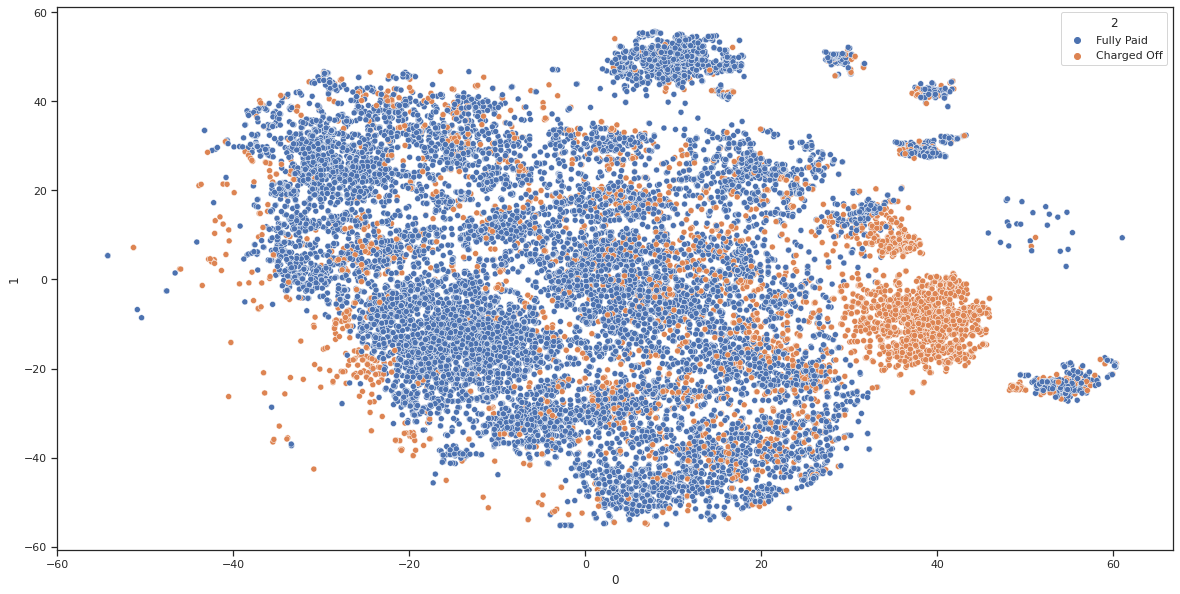

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=tsne_new_df,x =tsne_new_df.columns[0],y=tsne_new_df.columns[1],hue=tsne_new_df.columns[2])
plt.show()

In [ ]:
new_df

In [ ]:
#Agglomerative clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(correlated_data)
data_scaled = pd.DataFrame(data_scaled, columns=correlated_data.columns)
data_scaled.shape

(77159, 50)

In [ ]:
cl_data = data_scaled.head(20000)
cl_data.shape

(20000, 50)

In [ ]:
cl_data

emp_title  application_type  ...  pub_rec_bankruptcies  tax_liens
0       0.141421          0.141421  ...              0.141421   0.141421
1       0.167248          0.083624  ...              0.167248   0.083624
2       0.192055          0.064018  ...              0.064018   0.064018
3       0.205196          0.051299  ...              0.102598   0.051299
4       0.198575          0.039715  ...              0.039715   0.039715
...          ...               ...  ...                   ...        ...
19995   0.138937          0.000028  ...              0.000028   0.000028
19996   0.269487          0.000029  ...              0.000029   0.000029
19997   0.028610          0.000030  ...              0.000030   0.000030
19998   0.245205          0.000027  ...              0.000027   0.000027
19999   0.273872          0.000030  ...              0.000030   0.000030

[20000 rows x 50 columns]

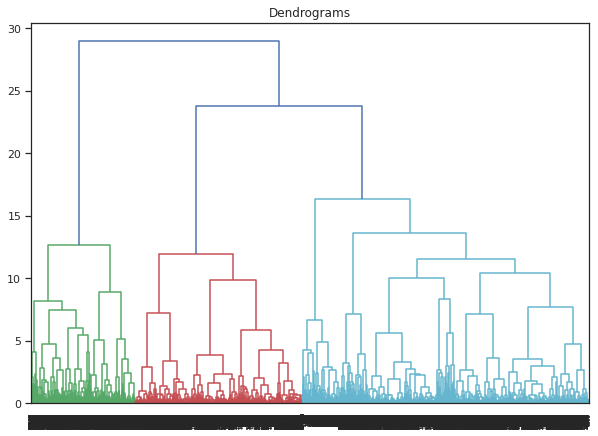

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cl_data, method='ward'))

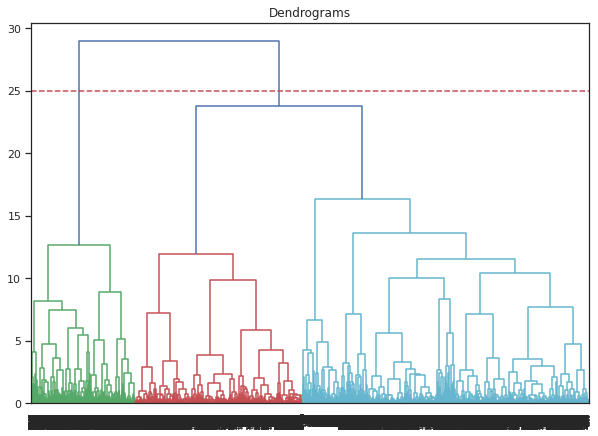

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cl_data, method='ward'))
plt.axhline(y=25, color='r', linestyle='--')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(cl_data)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
cl_data

emp_title  application_type  ...  pub_rec_bankruptcies  tax_liens
0       0.141421          0.141421  ...              0.141421   0.141421
1       0.167248          0.083624  ...              0.167248   0.083624
2       0.192055          0.064018  ...              0.064018   0.064018
3       0.205196          0.051299  ...              0.102598   0.051299
4       0.198575          0.039715  ...              0.039715   0.039715
...          ...               ...  ...                   ...        ...
19995   0.138937          0.000028  ...              0.000028   0.000028
19996   0.269487          0.000029  ...              0.000029   0.000029
19997   0.028610          0.000030  ...              0.000030   0.000030
19998   0.245205          0.000027  ...              0.000027   0.000027
19999   0.273872          0.000030  ...              0.000030   0.000030

[20000 rows x 50 columns]

In [ ]:
#t-sne dimensionality reduction
from sklearn.manifold import TSNE
new_df_2 = cl_data
label_data_2=data_frame['loan_status']

model = TSNE(n_components=2,random_state=0)

tsne_data =model.fit_transform(new_df_2)

In [ ]:
tsne_data

array([[-33.68205  ,  40.630157 ],
       [-33.730175 ,  40.680767 ],
       [-33.81253  ,  40.773903 ],
       ...,
       [-33.32906  ,   6.5417514],
       [ 20.824934 ,  52.885742 ],
       [-60.95665  ,  30.172962 ]], dtype=float32)

In [ ]:
label_data_2

label_data_2 = label_data_2.iloc[:20000]
label_data_2

0         Fully Paid
1        Charged Off
2            Current
3         Fully Paid
4         Fully Paid
            ...     
19995        Current
19996     Fully Paid
19997     Fully Paid
19998        Current
19999     Fully Paid
Name: loan_status, Length: 20000, dtype: object

In [ ]:
tsne_data = np.vstack((tsne_data.T,label_data_2)).T
tsne_df = pd.DataFrame(data = tsne_data )
tsne_df
#sns.FacetGrid(tsne_df,size=6).map(plt.scatter,"x","y").add.legend()
#plt.show()

0        1            2
0      -33.682  40.6302   Fully Paid
1     -33.7302  40.6808  Charged Off
2     -33.8125  40.7739      Current
3     -33.8933  40.8637   Fully Paid
4      -33.873  40.8408   Fully Paid
...        ...      ...          ...
19995  52.3958  50.0338      Current
19996 -44.6168   -5.996   Fully Paid
19997 -33.3291  6.54175   Fully Paid
19998  20.8249  52.8857      Current
19999 -60.9566   30.173   Fully Paid

[20000 rows x 3 columns]

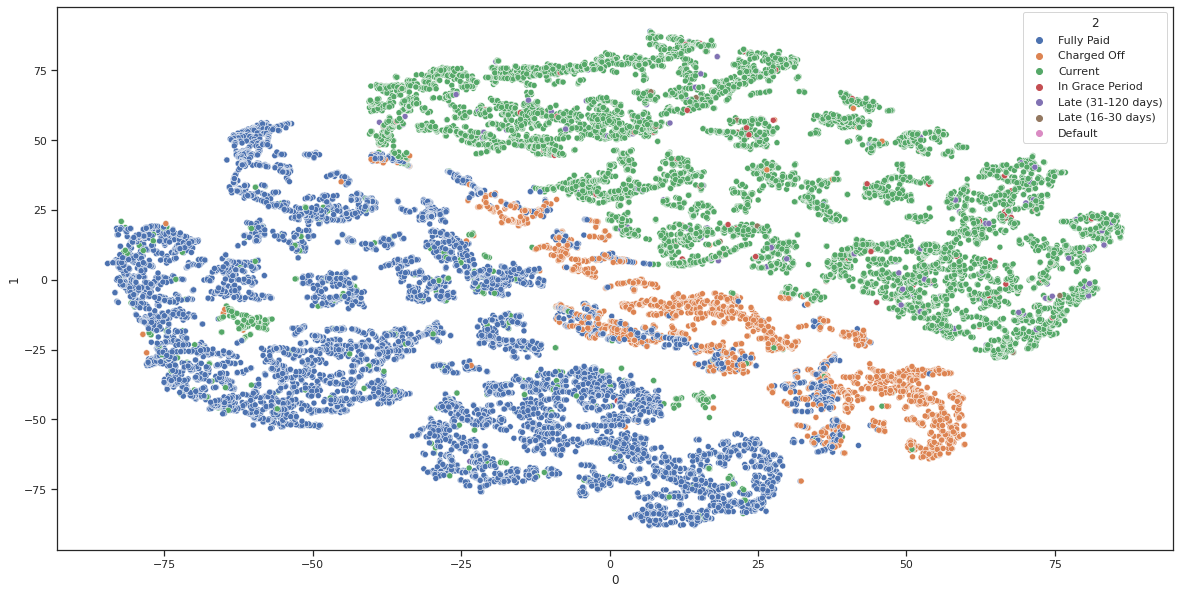

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=tsne_df,x =tsne_df.columns[0],y=tsne_df.columns[1],hue=tsne_df.columns[2])
plt.show()

In [ ]:


tsne_df

ind = tsne_df[tsne_df[2] == "current"].index


tsne_df.drop(ind)

0        1            2
0      -33.682  40.6302   Fully Paid
1     -33.7302  40.6808  Charged Off
2     -33.8125  40.7739      Current
3     -33.8933  40.8637   Fully Paid
4      -33.873  40.8408   Fully Paid
...        ...      ...          ...
19995  52.3958  50.0338      Current
19996 -44.6168   -5.996   Fully Paid
19997 -33.3291  6.54175   Fully Paid
19998  20.8249  52.8857      Current
19999 -60.9566   30.173   Fully Paid

[20000 rows x 3 columns]